# Preprocessing script for Heeren raw data

In [1]:
import os
import shutil
import re
import glob
import shutil
import os.path
from os import mkdir
from os.path import join, dirname, abspath, normpath

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
# Paths
CONFIG_DIR = dirname(abspath(''))
DATA_RAW_DIR = join(CONFIG_DIR,'data_lake','Heeren','raw', '2019.12.04_Full_Data') # specify the directory

# To do

In [3]:
directory = 'temp'
parent_dir = CONFIG_DIR
path = os.path.join(parent_dir, directory)
path

'C:\\Users\\Carel\\data_lake\\Heeren\\temp'

In [4]:
os.mkdir(path) #create a folder named 'temp' based on the directory stated.

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Carel\\temp'

# csv files

In [4]:
# CH_INFO_TABLE
raw_files = glob.glob(DATA_RAW_DIR + "\CH_INFO_TABLE*.csv")

df = pd.concat((pd.read_csv(f, header = 0) for f in raw_files)) 
df.to_csv("CH_INFO_TABLE_ALL.csv", index=False)

ValueError: No objects to concatenate

In [6]:
# OVERVIEW_TABLE
raw_files1 = glob.glob(DATA_RAW_DIR + "\OVERVIEW_TABLE*.csv") 

# Formatting timestamp

In [7]:
res = [0] * len(raw_files1)
month = [0] * len(raw_files1)
date = [0] * len(raw_files1)
for i in range(len(raw_files1)):
    res[i] = re.search('(?<=TABLE19)\w+',raw_files1[i])
    month[i] = res[i].group(0)[:2]
    date[i] = res[i].group(0)[2:4]
    
print(res[i].group(0)) 
year = [2019]*len(date)
date1 = pd.DataFrame(list(zip(year,month, date))) #respective dates
date1.columns = ['year','month','day']
date1 = pd.to_datetime(date1)
print(date1)

1202_000000
0     2019-02-28
1     2019-03-01
2     2019-03-02
3     2019-03-03
4     2019-03-04
         ...    
272   2019-11-28
273   2019-11-29
274   2019-11-30
275   2019-12-01
276   2019-12-02
Length: 277, dtype: datetime64[ns]


In [8]:
for j in range(len(raw_files1)):
    file = pd.read_csv(raw_files1[j],header=0,parse_dates=['timestamp'])
    hour = [0]*len(file)
    time = [0]*len(file)
    try:
        pd.to_datetime(file['timestamp'])
        basename = os.path.basename(raw_files1[j])
        source = raw_files1[j]
        destination = path + "\\"+ basename
        shutil.copyfile(source, destination) #create a copy of this file that is in correct format to 'temp' folder    
    except (TypeError, ValueError) as e:
        #formatting of the time
        for i in range(len(file)):
            if file['timestamp'][i] == "00:00.0" and i == 0:
                hour[i] = 0
                time[i] = str(hour[i]) + ":" + file['timestamp'][i]
            elif file['timestamp'][i] == "00:00.0" and i != 0:
                counts = (file['timestamp'][:i+1] == "00:00.0").sum()
                hour[i] = counts - 1
                time[i] = str(hour[i]) + ":" + file['timestamp'][i]
            elif file['timestamp'][i-1] > file['timestamp'][i]:
                hour[i] = hour[i-1] + 1 
                time[i] = str(hour[i]) + ":" + file['timestamp'][i]
            elif file['timestamp'][i-1] <= file['timestamp'][i]:
                hour[i] = hour[i-1]    
                time[i] = str(hour[i]) + ":" + file['timestamp'][i]
        file['timestamp'] = time #timestamp for individual files changes
        
        file.insert(0,'Date',date1[j] - timedelta(days=1)) #adding the dates
        file['timestamp1'] = file['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) + " " + file['timestamp']
        file = file.drop(['Date','timestamp'],axis=1) #drop the extra columns 
        file.insert(0,'timestamp', file['timestamp1']) #place the new timestamp as the first column
        file = file.drop(['timestamp1'],axis=1)
        print(file)
        
        #creating a copy of it in temp folder
        basename = os.path.basename(raw_files1[j])
        source = raw_files1[j]
        destination = path + "\\"+ basename
        file.to_csv(destination,index=False)
         
# length = 1429, check

                  timestamp timestamp_utc  BULBWET_VAL0  CHILLER1EFF_VAL0  \
0      2019-06-27 0:00:00.0       00:00.0     23.031034               0.0   
1      2019-06-27 0:01:00.0       01:00.0     23.066181               0.0   
2      2019-06-27 0:02:00.0       02:00.0     23.058701               0.0   
3      2019-06-27 0:03:00.0       03:00.0     23.061684               0.0   
4      2019-06-27 0:04:00.0       04:00.0     23.104313               0.0   
...                     ...           ...           ...               ...   
1424  2019-06-27 23:55:00.0       55:00.0     23.543419               0.0   
1425  2019-06-27 23:56:00.0       56:00.0     23.554493               0.0   
1426  2019-06-27 23:57:00.0       57:00.0     23.554821               0.0   
1427  2019-06-27 23:58:00.0       58:00.0     23.493694               0.0   
1428  2019-06-27 23:59:00.0       59:00.0     23.509180               0.0   

      CHILLER1RT_VAL0  CHILLER1TOTAL_POWER_VAL0  CHILLER1VOLUMEFLOW_VAL0  \

                  timestamp timestamp_utc  BULBWET_VAL0  CHILLER1EFF_VAL0  \
0      2019-06-29 0:00:00.0       00:00.0     23.682714               0.0   
1      2019-06-29 0:01:00.0       01:00.0     23.713436               0.0   
2      2019-06-29 0:02:00.0       02:00.0     23.709593               0.0   
3      2019-06-29 0:03:00.0       03:00.0     23.678873               0.0   
4      2019-06-29 0:04:00.0       04:00.0     23.701912               0.0   
...                     ...           ...           ...               ...   
1435  2019-06-29 23:55:00.0       55:00.0     23.391186               0.0   
1436  2019-06-29 23:56:00.0       56:00.0     23.387476               0.0   
1437  2019-06-29 23:57:00.0       57:00.0     23.409744               0.0   
1438  2019-06-29 23:58:00.0       58:00.0     23.436796               0.0   
1439  2019-06-29 23:59:00.0       59:00.0     23.466484               0.0   

      CHILLER1RT_VAL0  CHILLER1TOTAL_POWER_VAL0  CHILLER1VOLUMEFLOW_VAL0  \

                  timestamp timestamp_utc  BULBWET_VAL0  CHILLER1EFF_VAL0  \
0      2019-07-01 0:00:00.0       00:00.0     23.210068                 0   
1      2019-07-01 0:01:00.0       01:00.0     23.221449                 0   
2      2019-07-01 0:02:00.0       02:00.0     23.141731                 0   
3      2019-07-01 0:03:00.0       03:00.0     23.179712                 0   
4      2019-07-01 0:04:00.0       04:00.0     23.160728                 0   
...                     ...           ...           ...               ...   
1432  2019-07-01 23:56:00.0       56:00.0     23.095503                 0   
1433  2019-07-01 23:57:00.0       57:00.0     23.156916                 0   
1434  2019-07-01 23:58:00.0       58:00.0     23.164839                 0   
1435  2019-07-01 23:59:00.0       59:00.0     23.145353                 0   
1436  2019-07-01 24:00:00.0       00:00.0     23.145592                 0   

      CHILLER1RT_VAL0  CHILLER1TOTAL_POWER_VAL0  CHILLER1VOLUMEFLOW_VAL0  \

                  timestamp timestamp_utc  BULBWET_VAL0  CHILLER1EFF_VAL0  \
0      2019-07-03 0:00:00.0       00:00.0     23.855125                 0   
1      2019-07-03 0:01:00.0       01:00.0     23.831781                 0   
2      2019-07-03 0:02:00.0       02:00.0     23.824366                 0   
3      2019-07-03 0:03:00.0       03:00.0     23.812899                 0   
4      2019-07-03 0:04:00.0       04:00.0     23.816721                 0   
...                     ...           ...           ...               ...   
1436  2019-07-03 23:56:00.0       56:00.0     23.690077                 0   
1437  2019-07-03 23:57:00.0       57:00.0     23.717123                 0   
1438  2019-07-03 23:58:00.0       58:00.0     23.697979                 0   
1439  2019-07-03 23:59:00.0       59:00.0     23.640480                 0   
1440  2019-07-03 24:00:00.0       00:00.0     23.609728                 0   

      CHILLER1RT_VAL0  CHILLER1TOTAL_POWER_VAL0  CHILLER1VOLUMEFLOW_VAL0  \

# Merge csv files for overview dataset

In [9]:
path1 = glob.glob(path + "\OVERVIEW_TABLE*.csv") 
df = pd.concat((pd.read_csv(f, header = 0) for f in path1))
df.to_csv("OVERVIEW_TABLE_ALL.csv", index=False)

# Read in data

In [10]:
chiller_info = pd.read_csv(join(abspath(''),'CH_INFO_TABLE_ALL.csv'), parse_dates=["timestamp","timestamp_utc"])
overview = pd.read_csv(join(abspath(''),'OVERVIEW_TABLE_ALL.csv'), parse_dates=["timestamp"])

# Extracting individual chillers

In [11]:
chiller_info_colnames = list(chiller_info.columns)
CH1_pattern = re.compile(".*CHILLER1")
CH1_col = list(filter(CH1_pattern.match, chiller_info_colnames)) #function finds patterns that match
CH1_col.sort()
print(CH1_col)
print(len(CH1_col))
CH2_pattern = re.compile(".*CHILLER2")
CH2_col = list(filter(CH2_pattern.match, chiller_info_colnames))
CH2_col.sort()
print(CH2_col)
print(len(CH2_col))
CH3_pattern = re.compile(".*CHILLER3")
CH3_col = list(filter(CH3_pattern.match, chiller_info_colnames))
CH3_col.sort()
print(CH3_col)
print(len(CH3_col))
CH4_pattern = re.compile(".*CHILLER4")
CH4_col = list(filter(CH4_pattern.match, chiller_info_colnames))
CH4_col.sort()
print(CH4_col)
print(len(CH4_col))

['CHILLER1ACTIVE_DEMAN_VAL0', 'CHILLER1ACTUAL_VFD_S_VAL0', 'CHILLER1AVERAGE_LINE_VAL0', 'CHILLER1AVERAGE_LOAD_VAL0', 'CHILLER1CALC_EVAP_SA_VAL0', 'CHILLER1CHWR_ENT_CHI_VAL0', 'CHILLER1CHWS_LEAVING_VAL0', 'CHILLER1COMP_DISCHAR_VAL0', 'CHILLER1COMP_MOTOR_F_VAL0', 'CHILLER1COMP_MOTOR_R_VAL0', 'CHILLER1COMP_MOTOR_W_VAL0', 'CHILLER1CONDENSER_AP_VAL0', 'CHILLER1CONDENSER_PR_VAL0', 'CHILLER1CONDENSER_RE_VAL0', 'CHILLER1CONTROL_MODE_VAL0', 'CHILLER1CONTROL_POIN_VAL0', 'CHILLER1ENTERING_CON_VAL0', 'CHILLER1EVAPORATOR_A_VAL0', 'CHILLER1EVAPORATOR_P_VAL0', 'CHILLER1EVAP_REFRIG__VAL0', 'CHILLER1FLOWTEMPERAT_VAL0', 'CHILLER1LEAVING_COND_VAL0', 'CHILLER1LINE_CURRENT_VAL0', 'CHILLER1LINE_CUR_022_VAL0', 'CHILLER1LINE_CUR_023_VAL0', 'CHILLER1LINE_KILOWAT_VAL0', 'CHILLER1LINE_POWER_F_VAL0', 'CHILLER1LINE_VOLT_PH_VAL0', 'CHILLER1LINE_VOL_027_VAL0', 'CHILLER1LINE_VOL_028_VAL0', 'CHILLER1OIL_PRESSURE_VAL0', 'CHILLER1OIL_RECLAIM__VAL0', 'CHILLER1OIL_SUMP_TEM_VAL0', 'CHILLER1PERCENT_LINE_VAL0', 'CHILLER1PERC

In [14]:
# add timestamp
CH1_col.insert(0, 'timestamp') 
CH2_col.insert(0, 'timestamp')
CH3_col.insert(0, 'timestamp')
CH4_col.insert(0, 'timestamp')
CH1_col

['timestamp',
 'timestamp',
 'CHILLER1ACTIVE_DEMAN_VAL0',
 'CHILLER1ACTUAL_VFD_S_VAL0',
 'CHILLER1AVERAGE_LINE_VAL0',
 'CHILLER1AVERAGE_LOAD_VAL0',
 'CHILLER1CALC_EVAP_SA_VAL0',
 'CHILLER1CHWR_ENT_CHI_VAL0',
 'CHILLER1CHWS_LEAVING_VAL0',
 'CHILLER1COMP_DISCHAR_VAL0',
 'CHILLER1COMP_MOTOR_F_VAL0',
 'CHILLER1COMP_MOTOR_R_VAL0',
 'CHILLER1COMP_MOTOR_W_VAL0',
 'CHILLER1CONDENSER_AP_VAL0',
 'CHILLER1CONDENSER_PR_VAL0',
 'CHILLER1CONDENSER_RE_VAL0',
 'CHILLER1CONTROL_MODE_VAL0',
 'CHILLER1CONTROL_POIN_VAL0',
 'CHILLER1ENTERING_CON_VAL0',
 'CHILLER1EVAPORATOR_A_VAL0',
 'CHILLER1EVAPORATOR_P_VAL0',
 'CHILLER1EVAP_REFRIG__VAL0',
 'CHILLER1FLOWTEMPERAT_VAL0',
 'CHILLER1LEAVING_COND_VAL0',
 'CHILLER1LINE_CURRENT_VAL0',
 'CHILLER1LINE_CUR_022_VAL0',
 'CHILLER1LINE_CUR_023_VAL0',
 'CHILLER1LINE_KILOWAT_VAL0',
 'CHILLER1LINE_POWER_F_VAL0',
 'CHILLER1LINE_VOLT_PH_VAL0',
 'CHILLER1LINE_VOL_027_VAL0',
 'CHILLER1LINE_VOL_028_VAL0',
 'CHILLER1OIL_PRESSURE_VAL0',
 'CHILLER1OIL_RECLAIM__VAL0',
 'CHILLER1OI

In [15]:
CH1 = chiller_info[CH1_col]
CH2 = chiller_info[CH2_col]
CH3 = chiller_info[CH3_col]
CH4 = chiller_info[CH4_col]

In [14]:
CH1

,timestamp,CHILLER1ACTIVE_DEMAN_VAL0,CHILLER1ACTUAL_VFD_S_VAL0,CHILLER1AVERAGE_LINE_VAL0,CHILLER1AVERAGE_LOAD_VAL0,CHILLER1CALC_EVAP_SA_VAL0,CHILLER1CHWR_ENT_CHI_VAL0,CHILLER1CHWS_LEAVING_VAL0,CHILLER1COMP_DISCHAR_VAL0,CHILLER1COMP_MOTOR_F_VAL0,...,CHILLER1RECLAIM_DELT_VAL0,CHILLER1RECTIFIER_TE_VAL0,CHILLER1RELATIVE_HUM_VAL0,CHILLER1REMOTE_START_VAL0,CHILLER1RUN_STATUS_VAL0,CHILLER1SYS_ALERT_VAL0,CHILLER1VFD_COLD_PLA_VAL0,CHILLER1VFD_COOLANT__VAL0,CHILLER1VFD_ENCLOSUR_VAL0,CHILLER1VOLTAGE_LINE_VAL0
0,2019-02-27 00:30:40,100.0,0.0,0.0,0.0,20.700001,19.299999,19.4,25.200001,0.0,...,3.4,38.799999,41.099998,1.0,0.0,0.0,35.299999,0.0,33.900002,420.700012
1,2019-02-27 00:31:40,100.0,0.0,0.0,0.0,20.700001,19.299999,19.4,25.200001,0.0,...,3.4,38.799999,41.099998,1.0,0.0,0.0,35.299999,0.0,34.000000,420.700012
2,2019-02-27 00:32:40,100.0,0.0,0.0,0.0,20.799999,19.299999,19.4,25.200001,0.0,...,3.4,38.900002,41.099998,1.0,0.0,0.0,35.299999,0.0,34.000000,421.100006
3,2019-02-27 00:33:40,100.0,0.0,0.0,0.0,20.799999,19.299999,19.5,25.200001,0.0,...,3.4,38.799999,41.099998,1.0,0.0,0.0,35.299999,0.0,34.000000,421.299988
4,2019-02-27 00:34:40,100.0,0.0,0.0,0.0,20.700001,19.299999,19.5,25.200001,0.0,...,3.4,38.799999,41.099998,1.0,0.0,0.0,35.299999,0.0,34.000000,421.100006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393006,2019-11-29 00:25:50,100.0,0.0,0.0,0.0,16.799999,15.400000,15.0,33.700001,0.0,...,3.4,38.799999,39.099998,1.0,0.0,0.0,35.299999,0.0,33.700001,421.299988
393007,2019-11-29 00:26:50,100.0,0.0,0.0,0.0,16.799999,15.400000,15.0,33.700001,0.0,...,3.4,38.799999,39.000000,1.0,0.0,0.0,35.299999,0.0,33.799999,421.500000
393008,2019-11-29 00:27:50,100.0,0.0,0.0,0.0,16.799999,15.400000,15.0,33.599998,0.0,...,3.4,38.799999,38.900002,1.0,0.0,0.0,35.299999,0.0,33.700001,421.600006
393009,2019-11-29 00:28:50,100.0,0.0,0.0,0.0,16.799999,15.400000,15.0,33.599998,0.0,...,3.4,38.799999,39.000000,1.0,0.0,0.0,35.299999,0.0,33.700001,421.600006


In [17]:
CH1.describe()

,CHILLER1ACTIVE_DEMAN_VAL0,CHILLER1ACTUAL_VFD_S_VAL0,CHILLER1AVERAGE_LINE_VAL0,CHILLER1AVERAGE_LOAD_VAL0,CHILLER1CALC_EVAP_SA_VAL0,CHILLER1CHWR_ENT_CHI_VAL0,CHILLER1CHWS_LEAVING_VAL0,CHILLER1COMP_DISCHAR_VAL0,CHILLER1COMP_MOTOR_F_VAL0,CHILLER1COMP_MOTOR_R_VAL0,...,CHILLER1RECLAIM_DELT_VAL0,CHILLER1RECTIFIER_TE_VAL0,CHILLER1RELATIVE_HUM_VAL0,CHILLER1REMOTE_START_VAL0,CHILLER1RUN_STATUS_VAL0,CHILLER1SYS_ALERT_VAL0,CHILLER1VFD_COLD_PLA_VAL0,CHILLER1VFD_COOLANT__VAL0,CHILLER1VFD_ENCLOSUR_VAL0,CHILLER1VOLTAGE_LINE_VAL0
count,393011.000000,393011.000000,393011.000000,393011.000000,393011.000000,393011.000000,393011.000000,393011.000000,393011.000000,393011.000000,...,393011.000000,393011.000000,393011.000000,393008.000000,393008.000000,393008.000000,393011.000000,393011.000000,393011.000000,393011.000000
mean,101.977490,15.027383,56.313980,111.491612,15.670206,17.693227,14.668964,30.233267,14.649168,477.019349,...,13.311384,36.956792,41.920714,0.687312,0.300345,0.012847,31.809459,28.845981,31.990190,435.433895
std,74.035152,69.711485,151.406532,254.110335,64.595819,70.636840,64.156843,64.808141,67.848360,749.750537,...,107.955010,65.609284,68.207198,0.463589,0.458409,0.112615,65.919949,79.067729,64.764948,258.871976
min,-2621.500000,-3254.100098,-3275.199951,-3276.800049,-2995.199951,-3174.399902,-2621.500000,-3174.399902,-3255.699951,-3130.800049,...,-3253.399902,-3148.800049,-3251.199951,0.000000,0.000000,0.000000,-3260.500000,-3148.800049,-2969.500000,-3275.199951
25%,100.000000,0.000000,0.000000,0.000000,12.300000,15.300000,12.400000,26.400000,0.000000,0.000000,...,3.400000,38.000000,40.099998,0.000000,0.000000,0.000000,29.500000,0.000000,32.599998,415.700012
50%,100.000000,0.000000,0.000000,0.000000,17.900000,16.799999,16.400000,29.100000,0.000000,0.000000,...,3.900000,38.599998,42.000000,1.000000,0.000000,0.000000,34.799999,0.000000,33.700001,418.299988
75%,100.000000,41.299999,137.800003,329.700012,19.900000,18.500000,18.400000,37.500000,40.500000,1209.900024,...,8.300000,39.299999,44.099998,1.000000,1.000000,0.000000,35.400002,100.000000,34.200001,421.299988
max,2892.800049,3247.100098,3227.199951,3251.399902,3150.100098,3174.399902,3174.399902,3098.899902,2990.699951,2820.100098,...,3201.300049,3123.300049,3200.100098,1.000000,1.000000,1.000000,3257.000000,2792.300049,3097.100098,3252.800049


In [18]:
CH1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393011 entries, 0 to 393010
Data columns (total 48 columns):
timestamp                    393011 non-null datetime64[ns]
CHILLER1ACTIVE_DEMAN_VAL0    393011 non-null float64
CHILLER1ACTUAL_VFD_S_VAL0    393011 non-null float64
CHILLER1AVERAGE_LINE_VAL0    393011 non-null float64
CHILLER1AVERAGE_LOAD_VAL0    393011 non-null float64
CHILLER1CALC_EVAP_SA_VAL0    393011 non-null float64
CHILLER1CHWR_ENT_CHI_VAL0    393011 non-null float64
CHILLER1CHWS_LEAVING_VAL0    393011 non-null float64
CHILLER1COMP_DISCHAR_VAL0    393011 non-null float64
CHILLER1COMP_MOTOR_F_VAL0    393011 non-null float64
CHILLER1COMP_MOTOR_R_VAL0    393011 non-null float64
CHILLER1COMP_MOTOR_W_VAL0    393011 non-null float64
CHILLER1CONDENSER_AP_VAL0    393011 non-null float64
CHILLER1CONDENSER_PR_VAL0    393011 non-null float64
CHILLER1CONDENSER_RE_VAL0    393011 non-null float64
CHILLER1CONTROL_MODE_VAL0    393008 non-null float64
CHILLER1CONTROL_POIN_VAL0    39301

In [15]:
eff1 = overview['CHILLER1EFF_VAL0']
eff2 = overview['CHILLER2EFF_VAL0']
eff3 = overview['CHILLER3EFF_VAL0']
eff4 = overview['CHILLER4EFF_VAL0']

In [63]:
CH1.size()

TypeError: 'numpy.int32' object is not callable

In [61]:
eff1

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
670410    0.469114
670411    0.459945
670412    0.460060
670413    0.462686
670414    0.453730
Name: CHILLER1EFF_VAL0, Length: 670415, dtype: float64

In [58]:
CH1.insert(eff1)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [20]:
eff1.describe()

count    670415.000000
mean          0.142446
std           0.410772
min         -85.630905
25%           0.000000
50%           0.000000
75%           0.455905
max          64.853401
Name: CHILLER1EFF_VAL0, dtype: float64

# Clean up column names

In [16]:
CH1.columns = [re.sub('^CHILLER1',"", x) for x in CH1.columns] 
CH1.columns = [re.sub('_VAL0$',"", x) for x in CH1.columns]
CH2.columns = [re.sub('^CHILLER2',"", x) for x in CH2.columns]
CH2.columns = [re.sub('_VAL0$',"", x) for x in CH2.columns]
CH3.columns = [re.sub('^CHILLER3',"", x) for x in CH3.columns]
CH3.columns = [re.sub('_VAL0$',"", x) for x in CH3.columns]
CH4.columns = [re.sub('^CHILLER4',"", x) for x in CH4.columns]
CH4.columns = [re.sub('_VAL0$',"", x) for x in CH4.columns]

In [207]:
new_path = join(abspath(''), 'Chillers')
mkdir(new_path)
print("Path created:", new_path)
CH1.to_csv(new_path + "\CH1.csv", index=False)
CH2.to_csv(new_path + "\CH2.csv", index=False)
CH3.to_csv(new_path + "\CH3.csv", index=False)
CH4.to_csv(new_path + "\CH4.csv", index=False)

Path created: C:\Users\Carel\Data\Chillers


# Data cleaning

In [17]:
from statistics import mean

In [18]:
ind1 = np.where(pd.isnull(CH1))
ind2 = np.where(pd.isnull(CH2))
ind3 = np.where(pd.isnull(CH3))
ind4 = np.where(pd.isnull(CH4))

In [19]:
CH1.iloc[ind1].columns

Index(['CONTROL_MODE', 'REMOTE_START', 'RUN_STATUS', 'SYS_ALERT',
       'CONTROL_MODE', 'REMOTE_START', 'RUN_STATUS', 'SYS_ALERT',
       'FLOWTEMPERAT', 'FLOWTEMPERAT', 'CONTROL_MODE', 'REMOTE_START',
       'RUN_STATUS', 'SYS_ALERT'],
      dtype='object')

In [20]:
print(CH3.isnull().sum()) #check

timestamp       0
timestamp       0
ACTIVE_DEMAN    2
ACTUAL_VFD_S    2
AVERAGE_LINE    2
AVERAGE_LOAD    2
CALC_EVAP_SA    2
COMP_DISCHAR    2
COMP_MOTOR_F    2
COMP_MOTOR_R    2
COMP_MOTOR_W    2
CONDENSER_AP    2
CONDENSER_PR    2
CONDENSER_RE    2
CONTROL_MODE    3
CONTROL_POIN    2
ENTERING_CHI    2
ENTERING_CON    2
EVAPORATOR_A    2
EVAPORATOR_P    2
EVAP_REFRIG_    2
INVERTER_TEM    2
LEAVING_CHIL    2
LEAVING_COND    2
LINE_CURRENT    2
LINE_CUR_105    2
LINE_CUR_106    2
LINE_KILOWAT    2
LINE_POWER_F    2
LINE_VOLT_PH    2
LINE_VOL_110    2
LINE_VOL_111    2
OIL_PRESSURE    2
OIL_RECLAIM_    2
OIL_SUMP_TEM    2
PERCENT_LINE    2
PERCENT_LOAD    2
PERCENT__116    2
PERCENT__117    2
RECLAIM_DELT    2
RECTIFIER_TE    2
RELATIVE_HUM    2
REMOTE_START    3
RUN_STATUS      3
SYS_ALERT       3
VFD_COLD_PLA    2
VFD_COOLANT_    2
VFD_ENCLOSUR    2
VOLTAGE_LINE    2
dtype: int64


In [21]:
cat_var = ['CONTROL_MODE','REMOTE_START','RUN_STATUS','SYS_ALERT']
for i in range(len(CH1.iloc[ind1])):
    if CH1.iloc[ind1].columns[i] in cat_var:
        CH1=CH1.fillna(method= 'ffill')
    else:
        CH1=CH1.fillna(mean(CH1[CH1.iloc[ind1].columns[i]]))   
        
for j in range(len(CH2.iloc[ind2])):
    if CH2.iloc[ind2].columns[j] in cat_var:
        CH2= CH2.fillna(method='ffill')
    else:
        CH2= CH2.fillna(mean(CH2[CH2.iloc[ind2].columns[j]]))
        
for k in range(len(CH3.iloc[ind3])):
    if CH3.iloc[ind3].columns[k] in cat_var:
        CH3 = CH3.fillna(method='ffill')
    else:
        CH3 = CH3.fillna(mean(CH3[CH3.iloc[ind3].columns[k]]))
        
for z in range(len(CH4.iloc[ind4])):
    if CH4.iloc[ind4].columns[z] in cat_var:
        CH4 = CH4.fillna(method='ffill')
    else:
        CH4 = CH4.fillna(mean(CH4[CH4.iloc[ind4].columns[z]]))

In [22]:
print(CH2.isnull().sum()) #check

timestamp       0
timestamp       0
ACTIVE_DEMAN    0
ACTUAL_VFD_S    0
AVERAGE_LINE    0
AVERAGE_LOAD    0
CALC_EVAP_SA    0
COMP_DISCHAR    0
COMP_MOTOR_F    0
COMP_MOTOR_R    0
COMP_MOTOR_W    0
CONDENSER_AP    0
CONDENSER_PR    0
CONDENSER_RE    0
CONTROL_MODE    0
CONTROL_POIN    0
ENTERING_CHI    0
ENTERING_CON    0
EVAPORATOR_A    0
EVAPORATOR_P    0
EVAP_REFRIG_    0
INVERTER_TEM    0
LEAVING_COND    0
LINE_CURRENT    0
LINE_CUR_059    0
LINE_CUR_060    0
LINE_KILOWAT    0
LINE_POWER_F    0
LINE_VOLT_PH    0
LINE_VOL_064    0
LINE_VOL_065    0
OIL_PRESSURE    0
OIL_RECLAIM_    0
OIL_SUMP_TEM    0
PERCENT_LINE    0
PERCENT_LOAD    0
PERCENT__070    0
PERCENT__071    0
RECLAIM_DELT    0
RECTIFIER_TE    0
RELATIVE_HUM    0
REMOTE_START    0
RUN_STATUS      0
SYS_ALERT       0
VFD_COLD_PLA    0
VFD_COOLANT_    0
VFD_ENCLOSUR    0
VOLTAGE_LINE    0
dtype: int64


In [23]:
overview.isnull().sum()

timestamp                            0
timestamp_utc                        0
BULBWET_VAL0                         3
CHILLER1EFF_VAL0                     0
CHILLER1RT_VAL0                      0
                                    ..
PODIUM_RT_LOAD_VAL0                  2
CHILLER1PERCENT_LINE_CURRENT_VAL0    0
CHILLER2PERCENT_LINE_CURRENT_VAL0    0
CHILLER3PERCENT_LINE_CURRENT_VAL0    2
CHILLER4PERCENT_LINE_CURRENT_VAL0    2
Length: 66, dtype: int64

In [24]:
overview=overview.fillna(method='ffill')

In [25]:
overview.isnull().sum()

timestamp                            0
timestamp_utc                        0
BULBWET_VAL0                         0
CHILLER1EFF_VAL0                     0
CHILLER1RT_VAL0                      0
                                    ..
PODIUM_RT_LOAD_VAL0                  0
CHILLER1PERCENT_LINE_CURRENT_VAL0    0
CHILLER2PERCENT_LINE_CURRENT_VAL0    0
CHILLER3PERCENT_LINE_CURRENT_VAL0    0
CHILLER4PERCENT_LINE_CURRENT_VAL0    0
Length: 66, dtype: int64

# Check for duplicates

In [26]:
print(chiller_info['timestamp'][chiller_info['timestamp'].duplicated()]) 
print(chiller_info['timestamp_utc'][chiller_info['timestamp_utc'].duplicated()])

378611   2019-11-19 00:29:50
Name: timestamp, dtype: datetime64[ns]
378611   2019-11-18 16:29:50
Name: timestamp_utc, dtype: datetime64[ns]


In [27]:
# check affected rows
chiller_info[378610:378613]

,timestamp,timestamp_utc,CHILLER1ACTIVE_DEMAN_VAL0,CHILLER1ACTUAL_VFD_S_VAL0,CHILLER1AVERAGE_LINE_VAL0,CHILLER1AVERAGE_LOAD_VAL0,CHILLER1CALC_EVAP_SA_VAL0,CHILLER1CHWR_ENT_CHI_VAL0,CHILLER1CHWS_LEAVING_VAL0,CHILLER1COMP_DISCHAR_VAL0,...,CHILLER2AVERAGE_LOAD_VAL0,CHILLER2CALC_EVAP_SA_VAL0,CHILLER2COMP_DISCHAR_VAL0,CHILLER2COMP_MOTOR_F_VAL0,CHILLER2COMP_MOTOR_R_VAL0,CHILLER2COMP_MOTOR_W_VAL0,CHILLER2CONDENSER_AP_VAL0,CHILLER2CONDENSER_PR_VAL0,CHILLER3EVAP_REFRIG__VAL0,CHILLER4COMP_DISCHAR_VAL0
378610,2019-11-19 00:29:50,2019-11-18 16:29:50,100.0,0.0,0.0,0.0,16.700001,15.2,14.9,32.5,...,0.0,16.299999,32.700001,0.0,0.0,20.799999,0.1,386.299988,18.200001,25.6
378611,2019-11-19 00:29:50,2019-11-18 16:29:50,100.0,0.0,0.0,0.0,16.700001,15.2,14.9,32.5,...,0.0,16.299999,32.700001,0.0,0.0,20.799999,0.1,386.299988,18.200001,25.6
378612,2019-11-19 00:30:50,2019-11-18 16:30:50,100.0,0.0,0.0,0.0,16.700001,15.2,14.9,32.5,...,0.0,16.299999,32.700001,0.0,0.0,20.799999,0.1,386.299988,18.200001,25.6


In [28]:
# remove row 378611 from chiller_info
chiller_info = chiller_info.drop(chiller_info.index[378611])
# check affected rows again
chiller_info[378610:378613]

,timestamp,timestamp_utc,CHILLER1ACTIVE_DEMAN_VAL0,CHILLER1ACTUAL_VFD_S_VAL0,CHILLER1AVERAGE_LINE_VAL0,CHILLER1AVERAGE_LOAD_VAL0,CHILLER1CALC_EVAP_SA_VAL0,CHILLER1CHWR_ENT_CHI_VAL0,CHILLER1CHWS_LEAVING_VAL0,CHILLER1COMP_DISCHAR_VAL0,...,CHILLER2AVERAGE_LOAD_VAL0,CHILLER2CALC_EVAP_SA_VAL0,CHILLER2COMP_DISCHAR_VAL0,CHILLER2COMP_MOTOR_F_VAL0,CHILLER2COMP_MOTOR_R_VAL0,CHILLER2COMP_MOTOR_W_VAL0,CHILLER2CONDENSER_AP_VAL0,CHILLER2CONDENSER_PR_VAL0,CHILLER3EVAP_REFRIG__VAL0,CHILLER4COMP_DISCHAR_VAL0
378610,2019-11-19 00:29:50,2019-11-18 16:29:50,100.000000,0.0,0.0,0.0,16.700001,15.200000,14.9,32.5,...,0.0,16.299999,32.700001,0.0,0.0,20.799999,0.1,386.299988,18.200001,25.6
378612,2019-11-19 00:30:50,2019-11-18 16:30:50,100.000000,0.0,0.0,0.0,16.700001,15.200000,14.9,32.5,...,0.0,16.299999,32.700001,0.0,0.0,20.799999,0.1,386.299988,18.200001,25.6
378613,2019-11-19 00:31:50,2019-11-18 16:31:50,435.799988,0.0,1.6,2790.5,0.000000,39.799999,0.0,36.5,...,0.0,16.400000,32.599998,0.0,0.0,20.799999,0.1,386.299988,18.200001,25.6


In [29]:
indx = np.where(overview['timestamp'].duplicated())
overview = overview.drop(overview.index[indx])

In [32]:
overview.iloc[5760:5763] #check

,timestamp,timestamp_utc,BULBWET_VAL0,CHILLER1EFF_VAL0,CHILLER1RT_VAL0,CHILLER1TOTAL_POWER_VAL0,CHILLER1VOLUMEFLOW_VAL0,CHILLER2EFF_VAL0,CHILLER2RT_VAL0,CHILLER2TOTAL_POWER_VAL0,...,TOWER_KW_VAL0,TOWER_SUPPLY_TEMP_VAL0,TOWER_RETURN_TEMP_VAL0,TOWER_FLOW_VAL0,TOWER_RT_LOAD_VAL0,PODIUM_RT_LOAD_VAL0,CHILLER1PERCENT_LINE_CURRENT_VAL0,CHILLER2PERCENT_LINE_CURRENT_VAL0,CHILLER3PERCENT_LINE_CURRENT_VAL0,CHILLER4PERCENT_LINE_CURRENT_VAL0
5760,2019-03-03 00:00:00.000,2019-03-02 16:00:00.000,21.089842,0.0,0.0,0.72,0.0,0.0,0.0,0.84,...,0.0,12.76,16.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5762,2019-03-03 00:01:00.000,2019-03-02 16:01:00.000,21.116573,0.0,0.0,0.72,0.0,0.0,0.0,0.84,...,0.0,12.79,16.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5763,2019-03-03 00:02:00.000,2019-03-02 16:02:00.000,21.089354,0.0,0.0,0.72,0.0,0.0,0.0,0.84,...,0.0,12.81,16.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA - comparing features across all chillers

In [64]:
compare_colnames = pd.DataFrame()
CH2_col.insert(21, 'NA')
compare_colnames["chiller1"] = CH1_col
compare_colnames["chiller2"] = CH2_col
compare_colnames["chiller3"] = CH3_col
compare_colnames["chiller4"] = CH4_col

ValueError: Length of values does not match length of index

In [40]:
# CH2, CH3, CH4 have same features except CH2 is missing a feature: LEAVING_CHIL
# CH1 looks different from the rest
compare_colnames

,chiller1,chiller2,chiller3,chiller4
0,timestamp,timestamp,timestamp,timestamp
1,CHILLER1ACTIVE_DEMAN_VAL0,CHILLER2ACTIVE_DEMAN_VAL0,CHILLER3ACTIVE_DEMAN_VAL0,CHILLER4ACTIVE_DEMAN_VAL0
2,CHILLER1ACTUAL_VFD_S_VAL0,CHILLER2ACTUAL_VFD_S_VAL0,CHILLER3ACTUAL_VFD_S_VAL0,CHILLER4ACTUAL_VFD_S_VAL0
3,CHILLER1AVERAGE_LINE_VAL0,CHILLER2AVERAGE_LINE_VAL0,CHILLER3AVERAGE_LINE_VAL0,CHILLER4AVERAGE_LINE_VAL0
4,CHILLER1AVERAGE_LOAD_VAL0,CHILLER2AVERAGE_LOAD_VAL0,CHILLER3AVERAGE_LOAD_VAL0,CHILLER4AVERAGE_LOAD_VAL0
5,CHILLER1CALC_EVAP_SA_VAL0,CHILLER2CALC_EVAP_SA_VAL0,CHILLER3CALC_EVAP_SA_VAL0,CHILLER4CALC_EVAP_SA_VAL0
6,CHILLER1CHWR_ENT_CHI_VAL0,CHILLER2COMP_DISCHAR_VAL0,CHILLER3COMP_DISCHAR_VAL0,CHILLER4COMP_DISCHAR_VAL0
7,CHILLER1CHWS_LEAVING_VAL0,CHILLER2COMP_MOTOR_F_VAL0,CHILLER3COMP_MOTOR_F_VAL0,CHILLER4COMP_MOTOR_F_VAL0
8,CHILLER1COMP_DISCHAR_VAL0,CHILLER2COMP_MOTOR_R_VAL0,CHILLER3COMP_MOTOR_R_VAL0,CHILLER4COMP_MOTOR_R_VAL0
9,CHILLER1COMP_MOTOR_F_VAL0,CHILLER2COMP_MOTOR_W_VAL0,CHILLER3COMP_MOTOR_W_VAL0,CHILLER4COMP_MOTOR_W_VAL0


# Common features among chillers

In [19]:
comm_feat_names = list(set(CH1.columns) & set(CH2.columns.insert(21,'NA')) & set(CH3.columns) & set(CH4.columns))
comm_feat_names.sort()
comm_feat_names #39 features, including 'timestamp'

['ACTIVE_DEMAN',
 'ACTUAL_VFD_S',
 'AVERAGE_LINE',
 'AVERAGE_LOAD',
 'CALC_EVAP_SA',
 'COMP_DISCHAR',
 'COMP_MOTOR_F',
 'COMP_MOTOR_R',
 'COMP_MOTOR_W',
 'CONDENSER_AP',
 'CONDENSER_PR',
 'CONDENSER_RE',
 'CONTROL_MODE',
 'CONTROL_POIN',
 'ENTERING_CON',
 'EVAPORATOR_A',
 'EVAPORATOR_P',
 'EVAP_REFRIG_',
 'LEAVING_COND',
 'LINE_CURRENT',
 'LINE_KILOWAT',
 'LINE_POWER_F',
 'LINE_VOLT_PH',
 'OIL_PRESSURE',
 'OIL_RECLAIM_',
 'OIL_SUMP_TEM',
 'PERCENT_LINE',
 'PERCENT_LOAD',
 'RECLAIM_DELT',
 'RECTIFIER_TE',
 'RELATIVE_HUM',
 'REMOTE_START',
 'RUN_STATUS',
 'SYS_ALERT',
 'VFD_COLD_PLA',
 'VFD_COOLANT_',
 'VFD_ENCLOSUR',
 'VOLTAGE_LINE',
 'timestamp']

In [20]:
CH1.columns.drop(comm_feat_names[:]) #9 features unique to CH1 

Index(['CHWR_ENT_CHI', 'CHWS_LEAVING', 'FLOWTEMPERAT', 'LINE_CUR_022',
       'LINE_CUR_023', 'LINE_VOL_027', 'LINE_VOL_028', 'PERCENT__033',
       'PERCENT__034'],
      dtype='object')

# Plots

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

In [ ]:
#4 Categorical variables: control mode, remote start, run status, sys alert, 43 quantitative variables, total 47 variables.

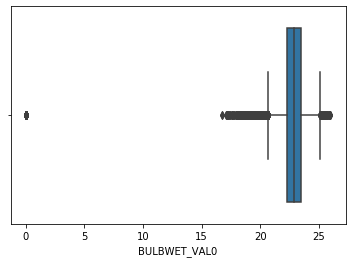

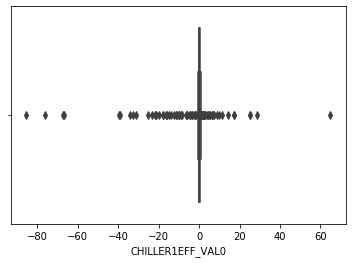

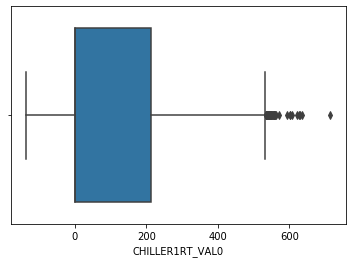

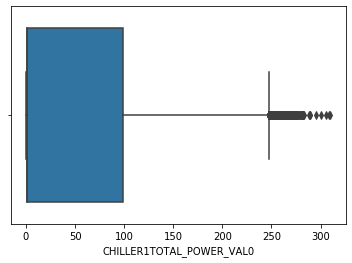

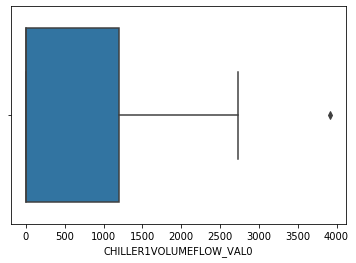

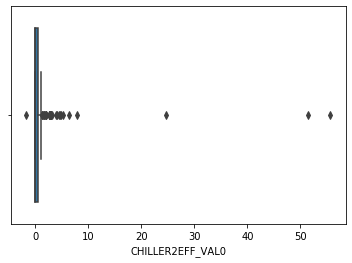

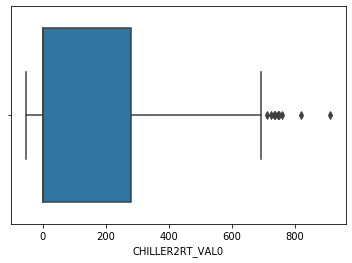

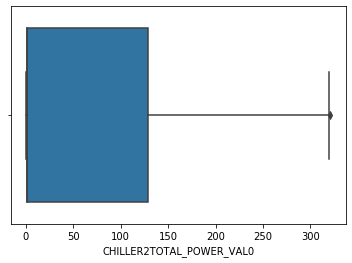

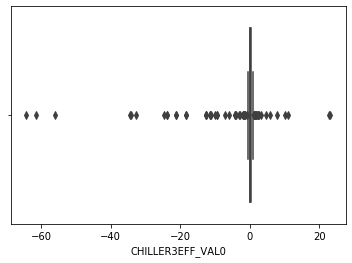

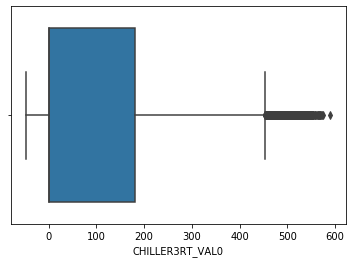

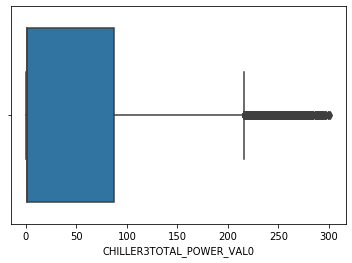

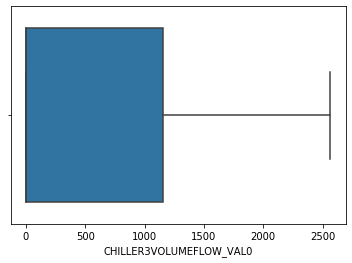

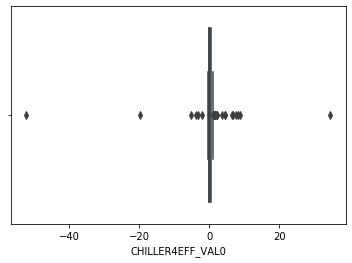

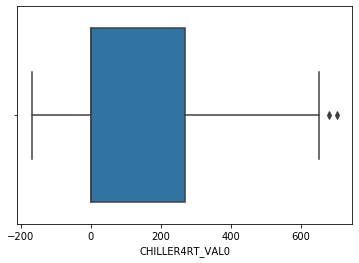

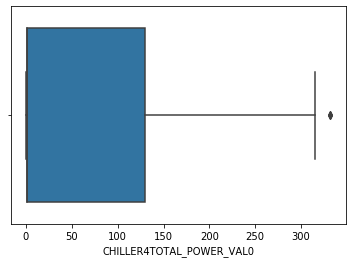

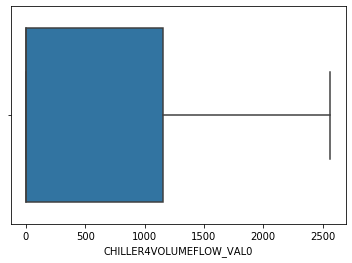

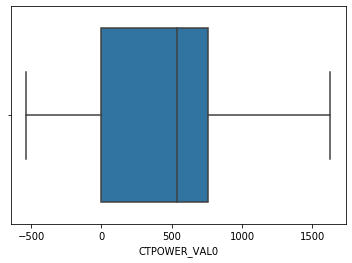

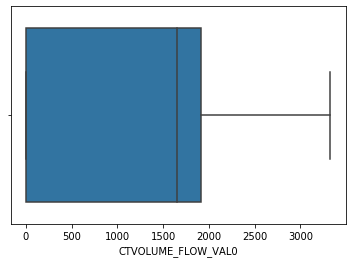

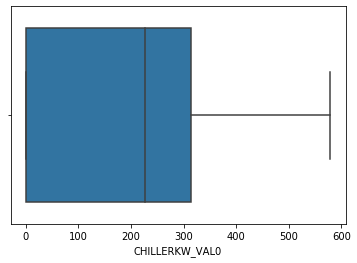

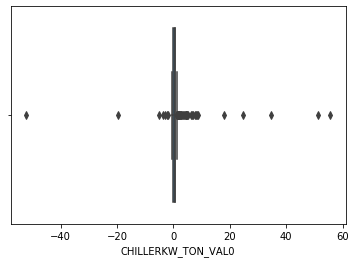

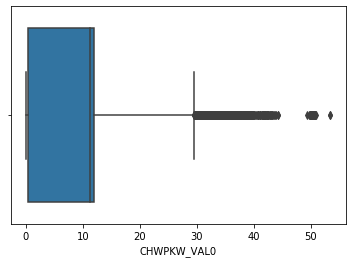

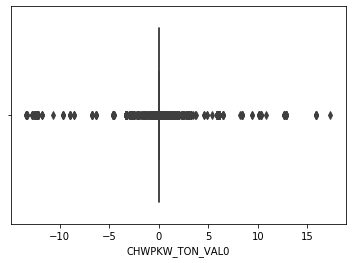

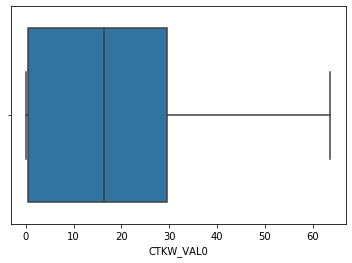

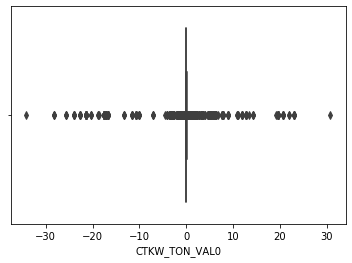

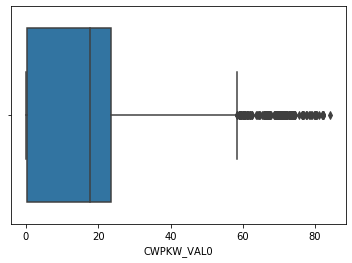

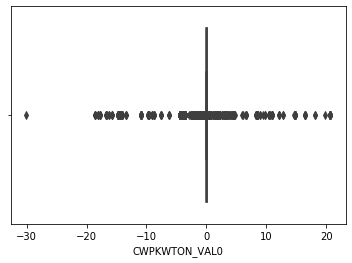

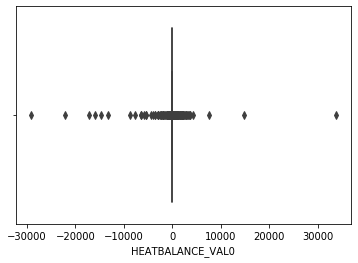

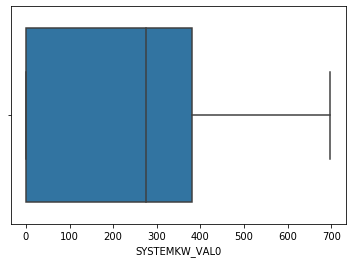

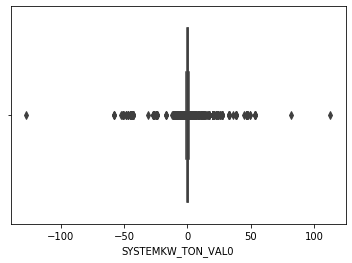

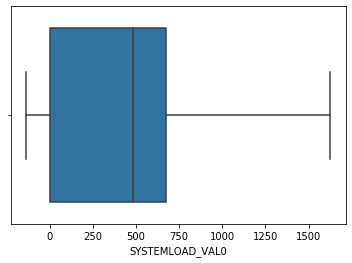

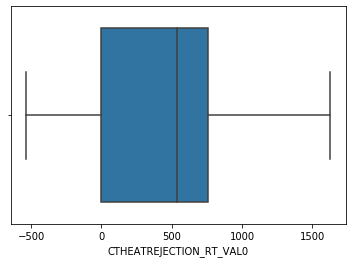

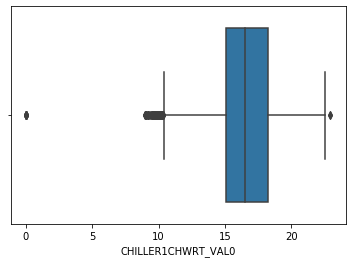

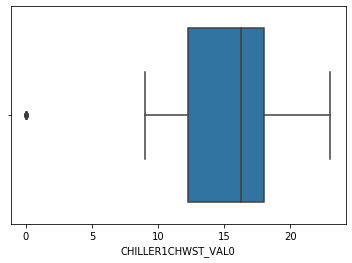

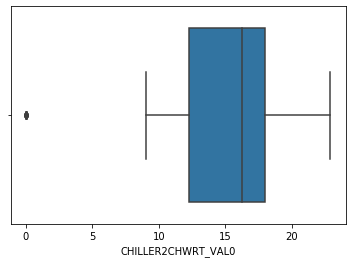

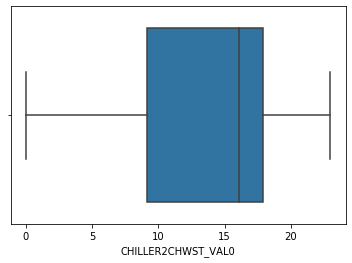

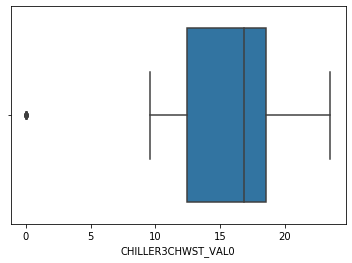

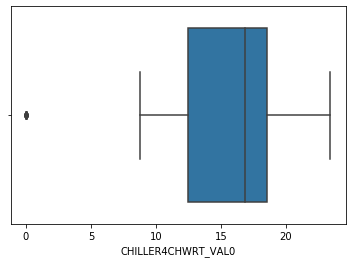

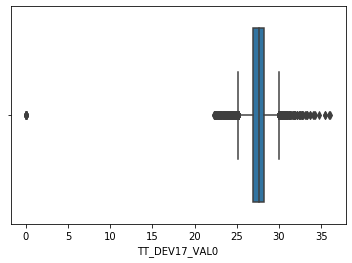

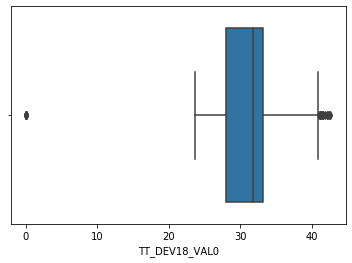

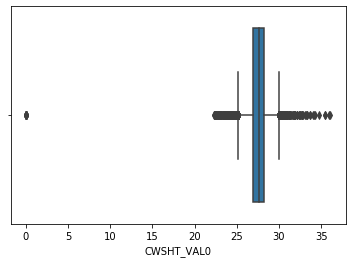

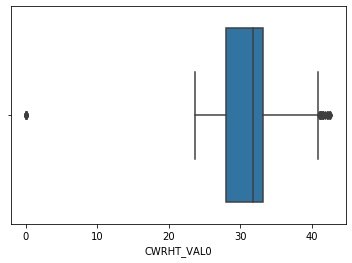

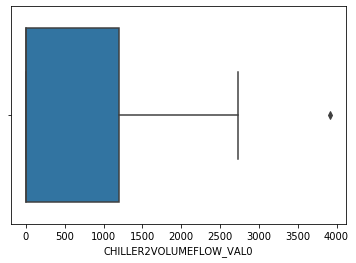

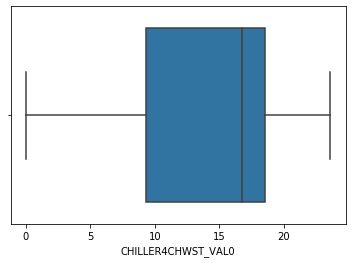

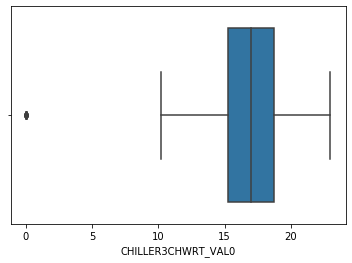

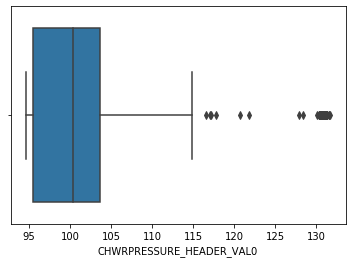

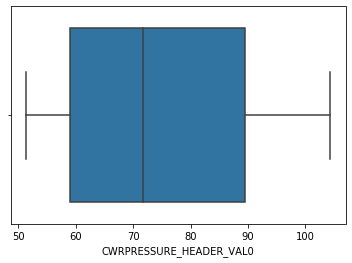

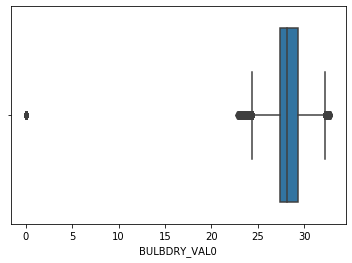

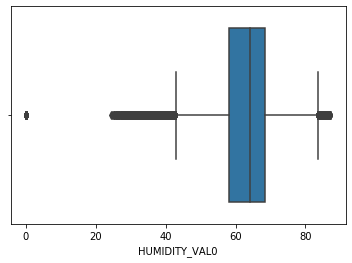

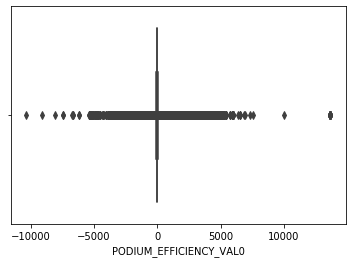

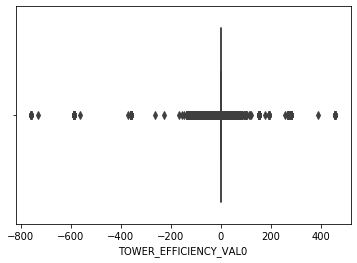

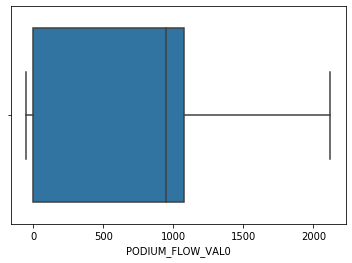

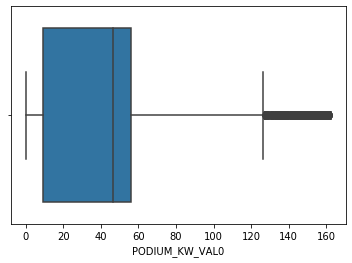

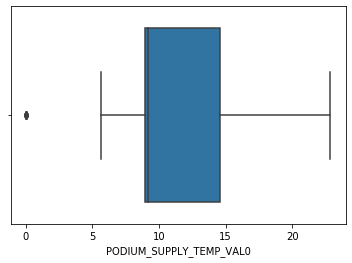

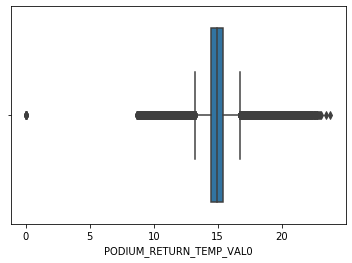

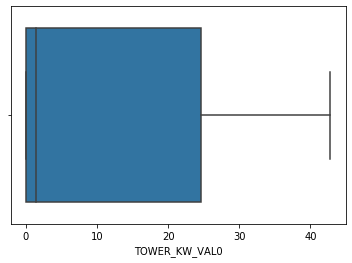

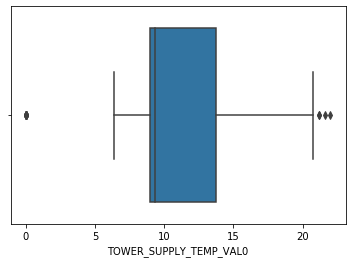

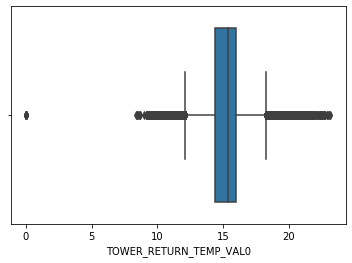

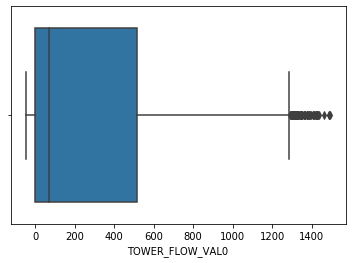

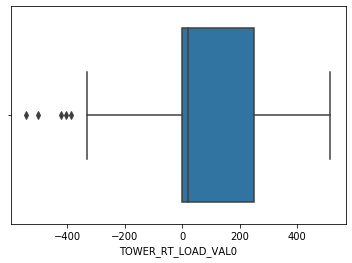

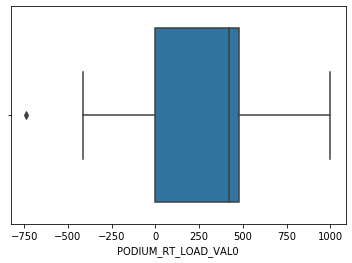

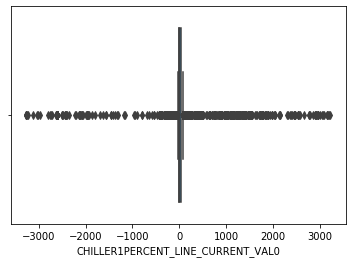

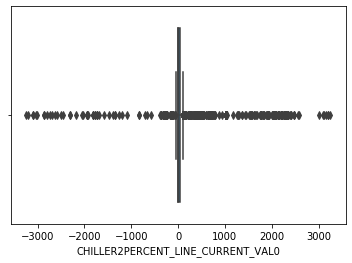

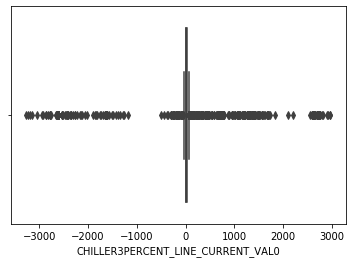

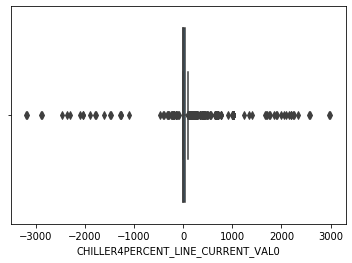

In [191]:
for variable in overview.columns[2:]:
    sns.boxplot(overview[variable])
    plt.show()

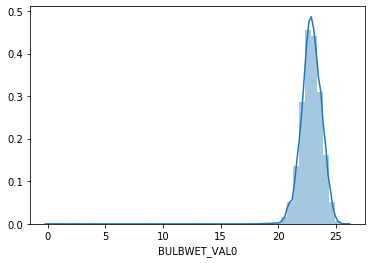

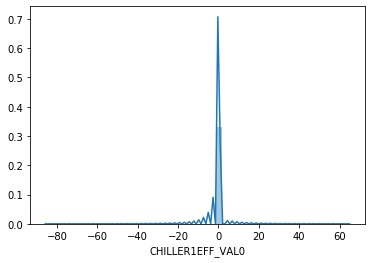

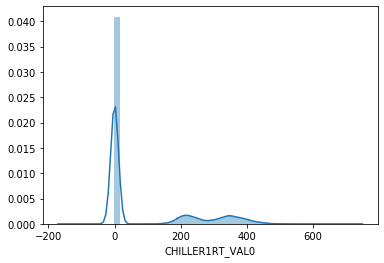

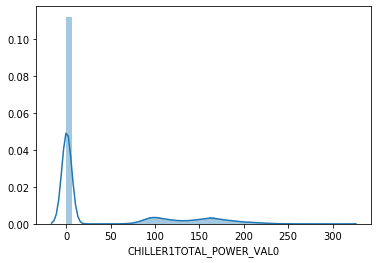

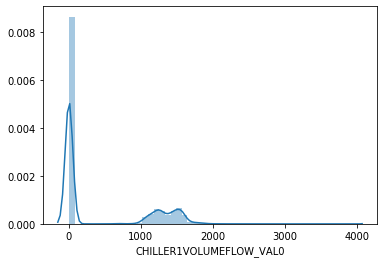

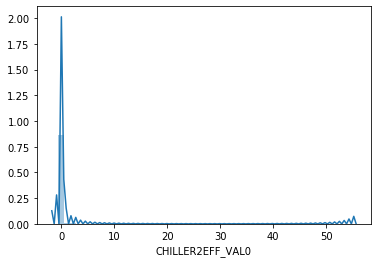

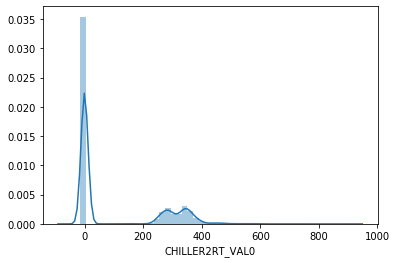

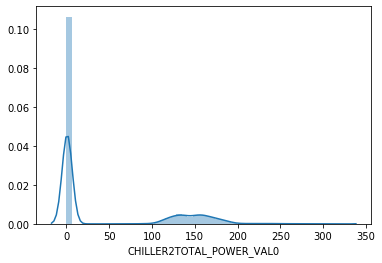

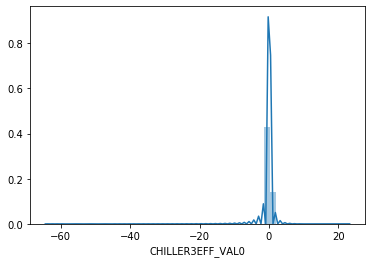

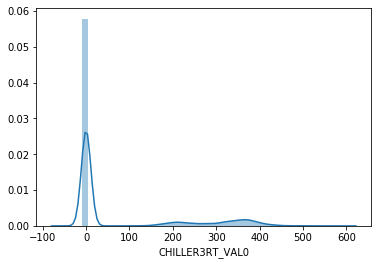

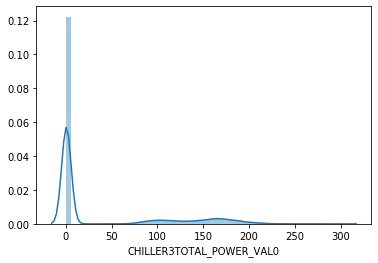

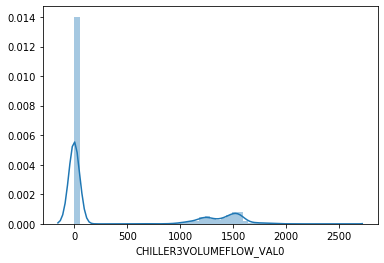

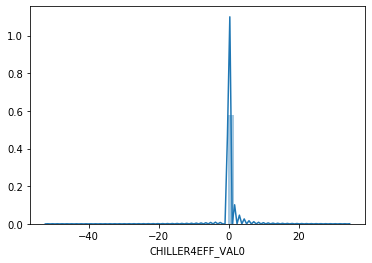

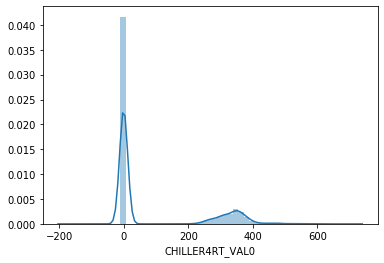

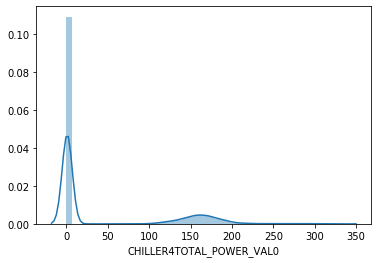

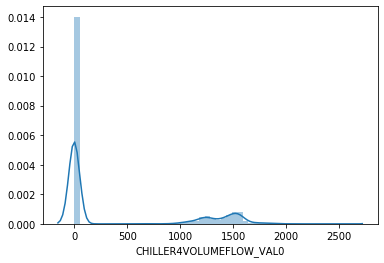

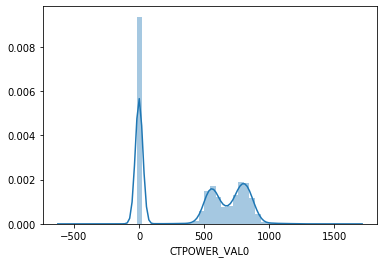

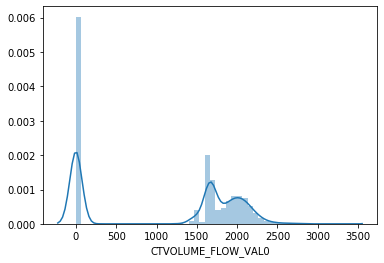

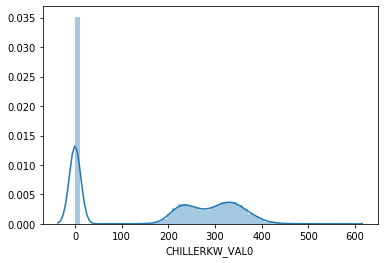

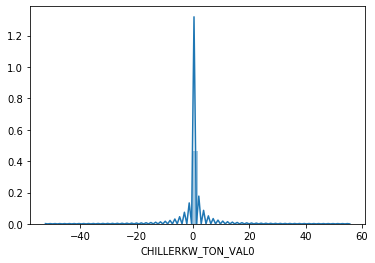

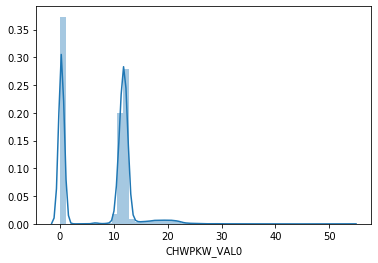

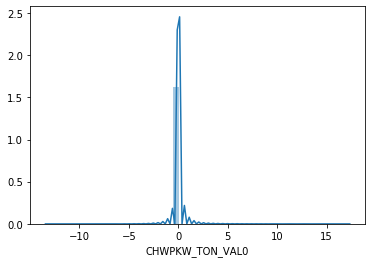

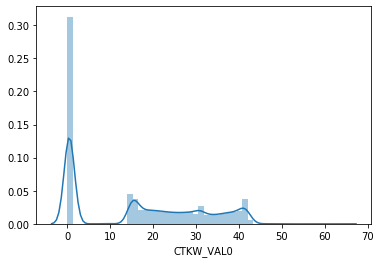

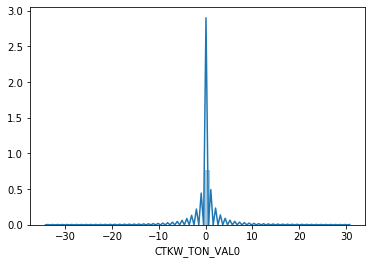

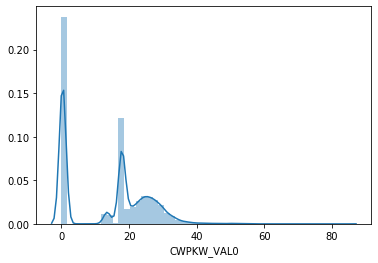

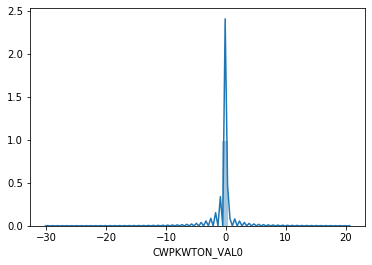

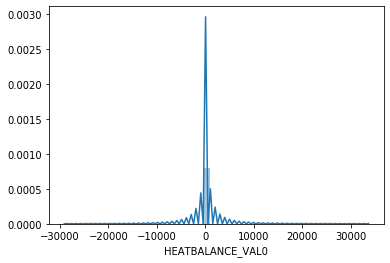

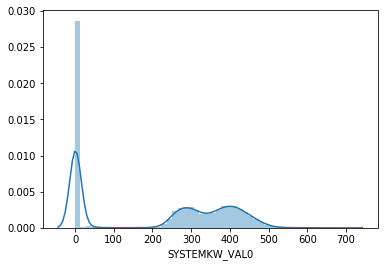

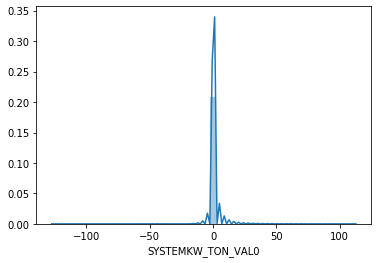

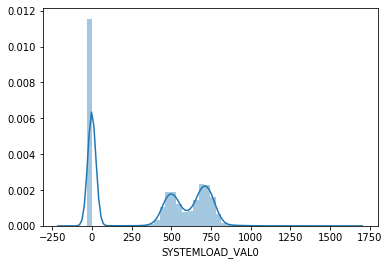

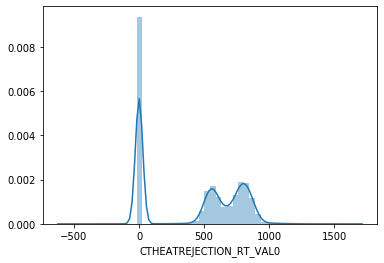

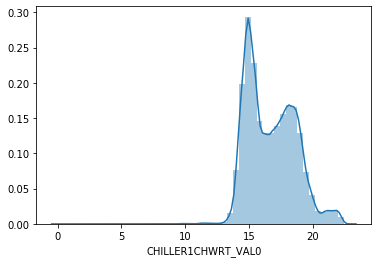

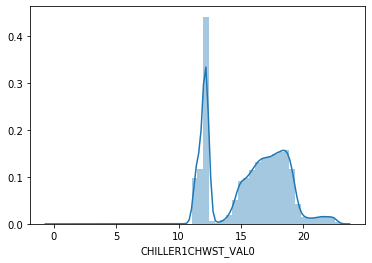

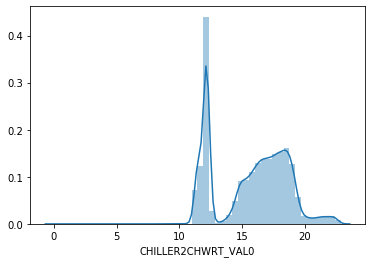

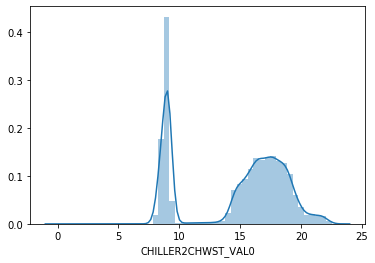

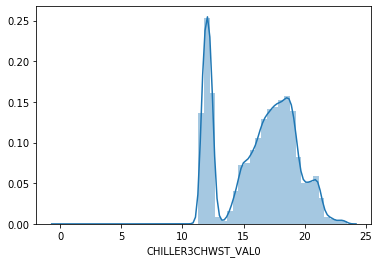

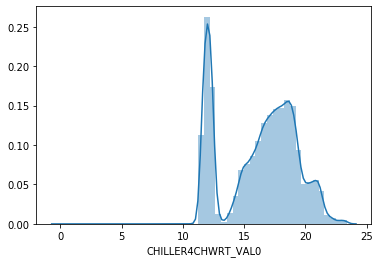

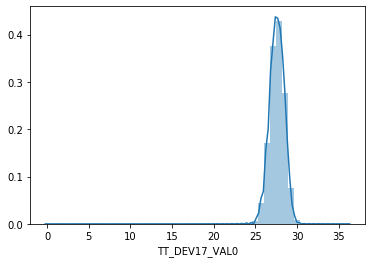

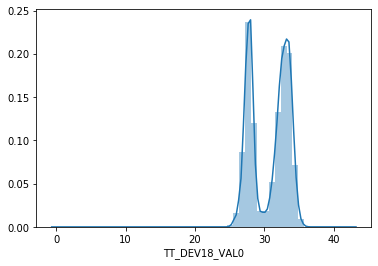

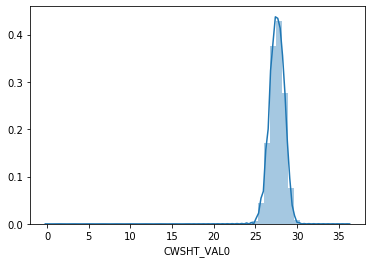

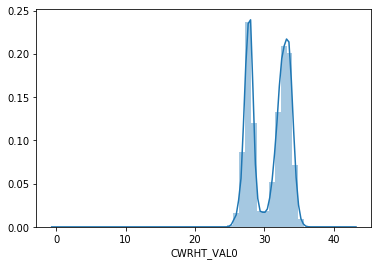

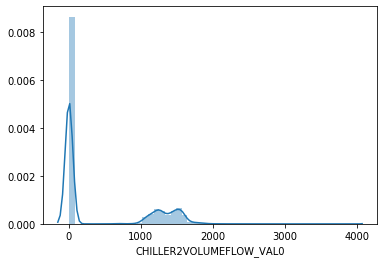

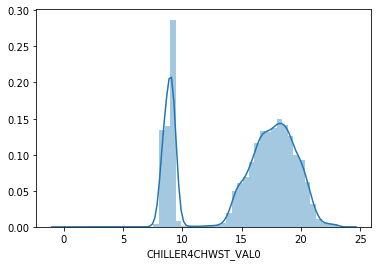

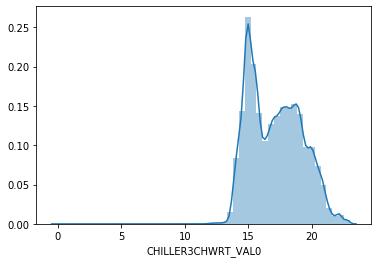

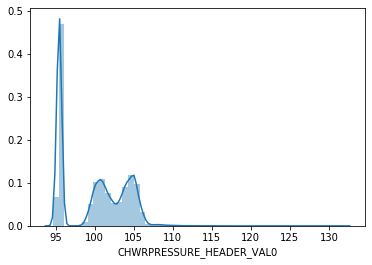

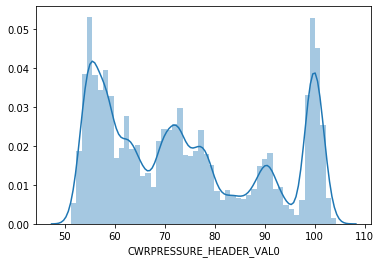

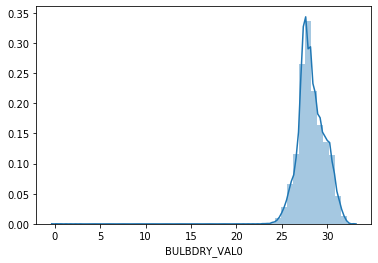

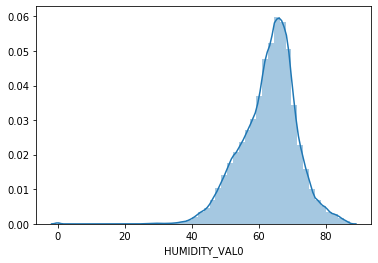

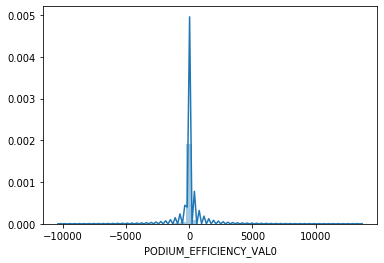

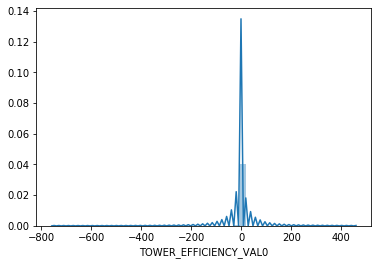

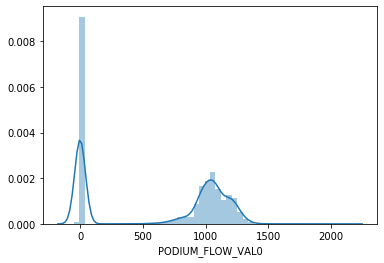

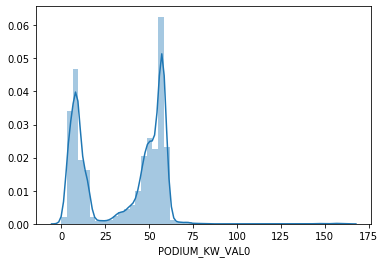

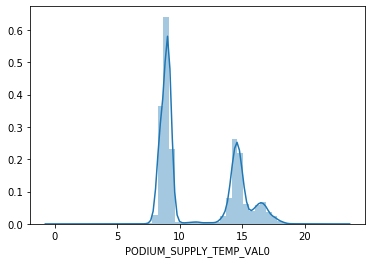

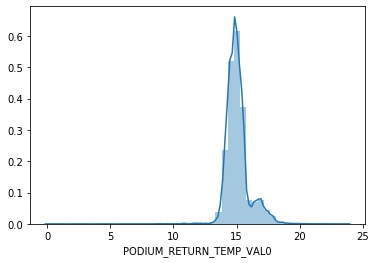

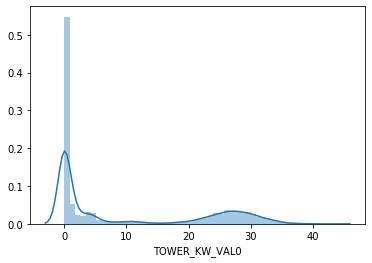

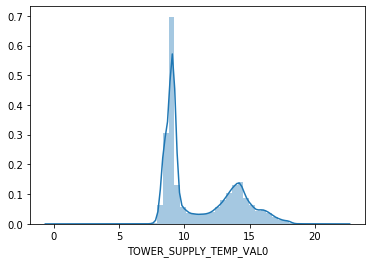

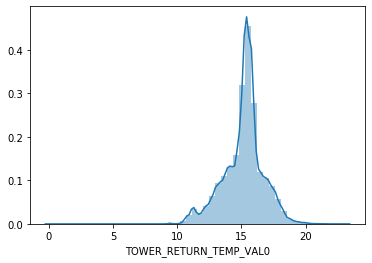

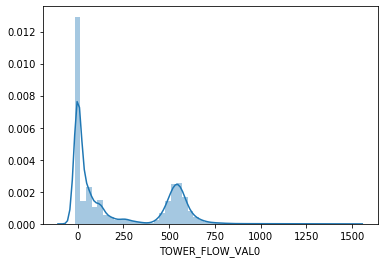

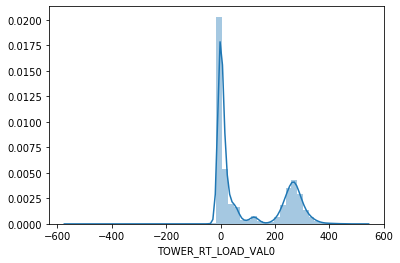

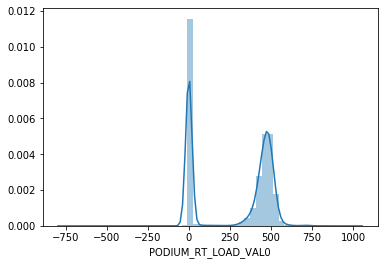

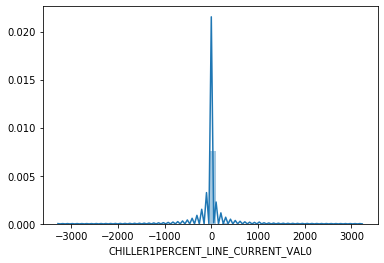

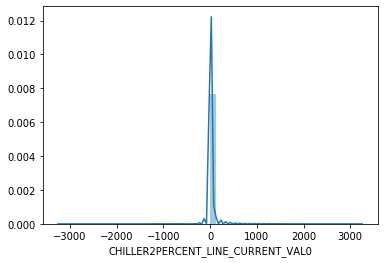

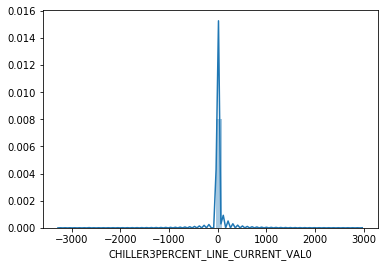

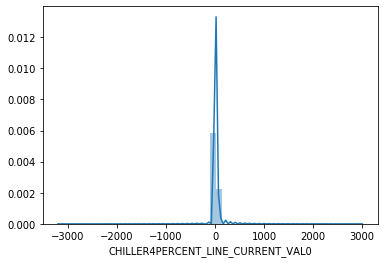

In [192]:
for variable in overview.columns[2:]:
    sns.distplot(overview[variable])
    plt.show()

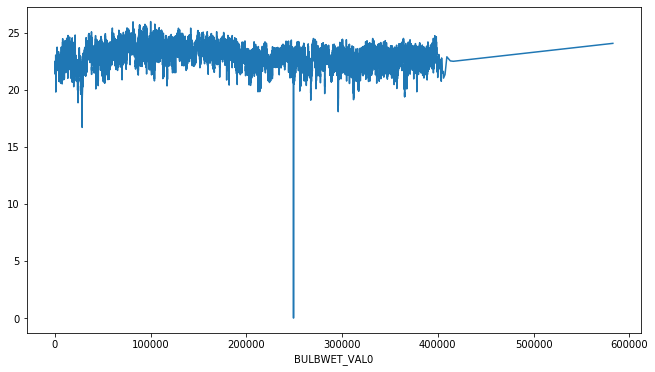

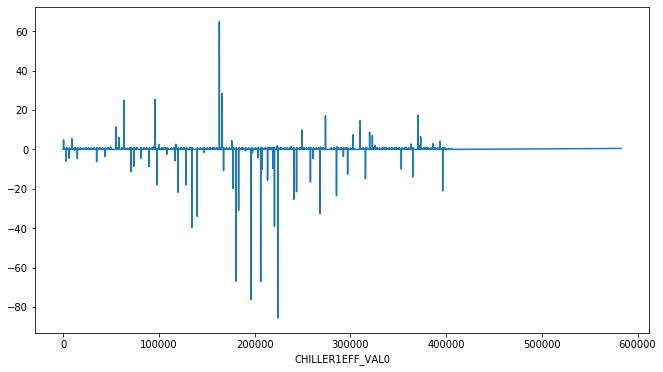

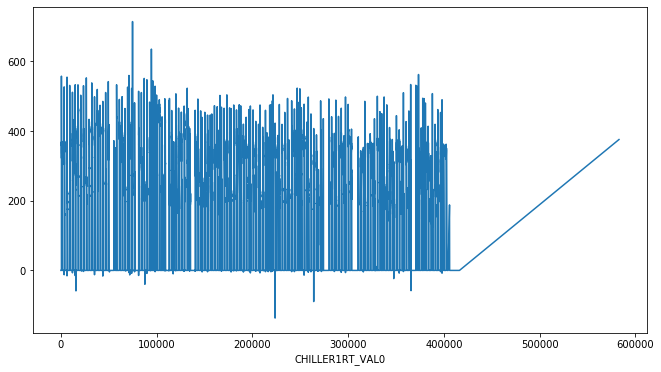

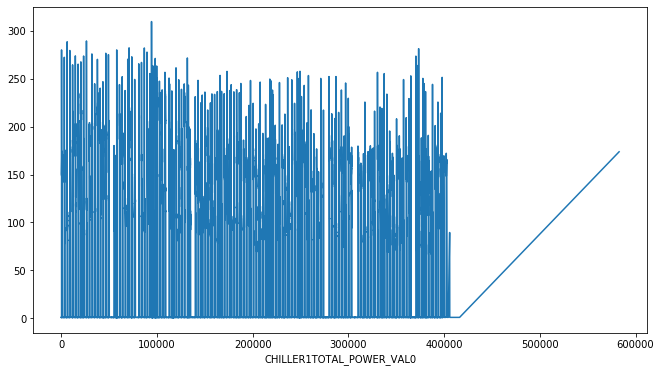

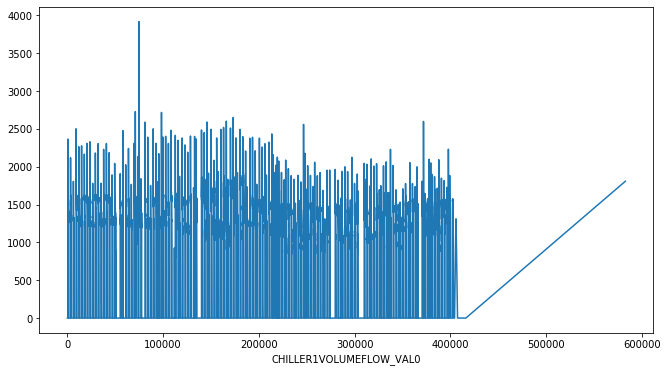

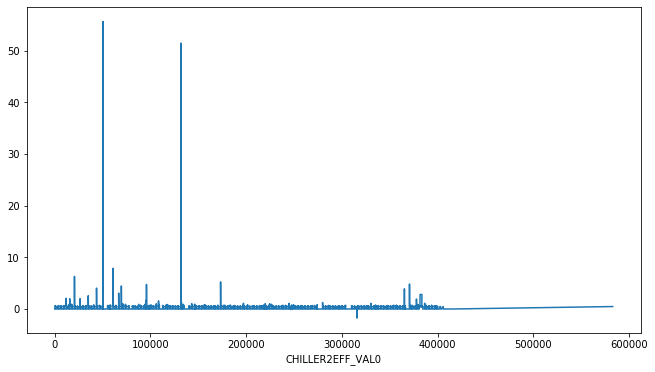

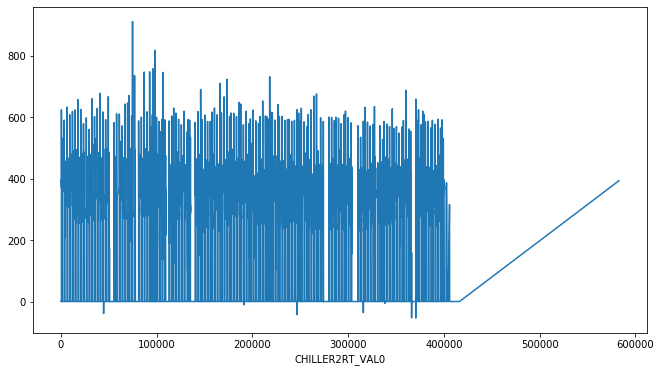

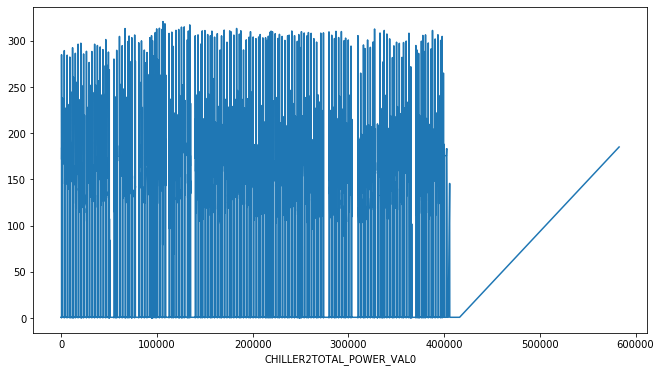

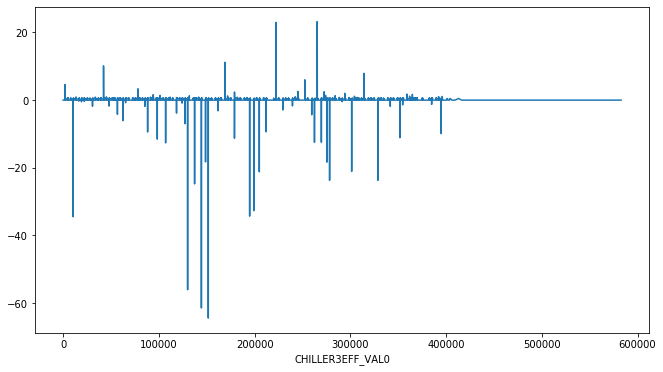

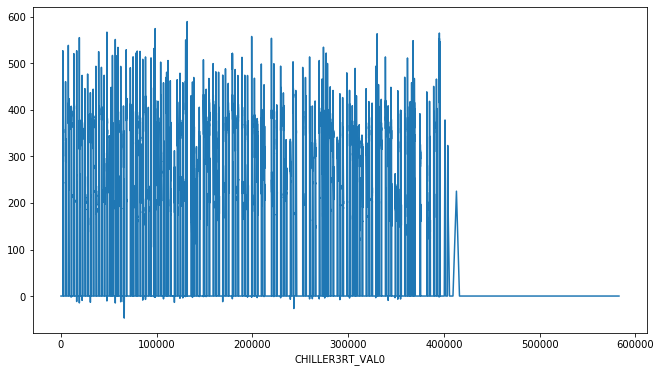

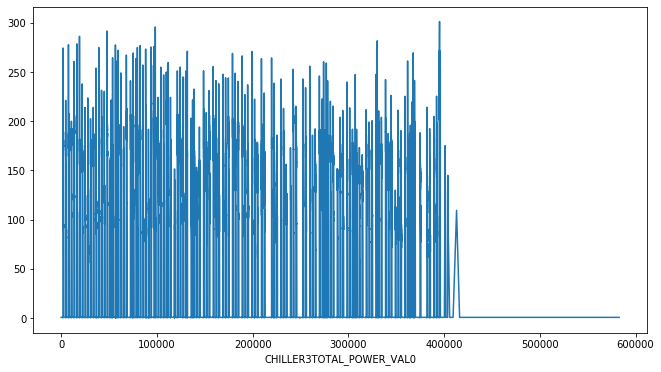

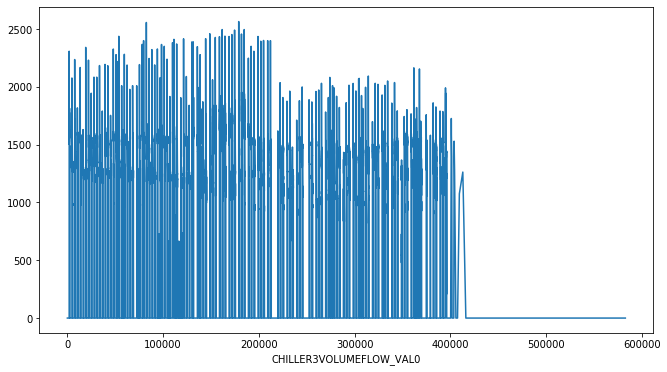

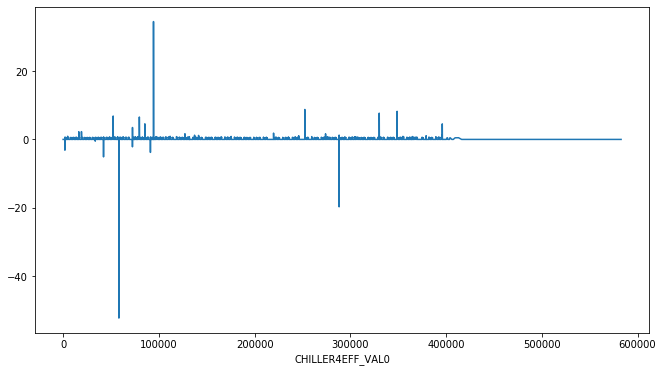

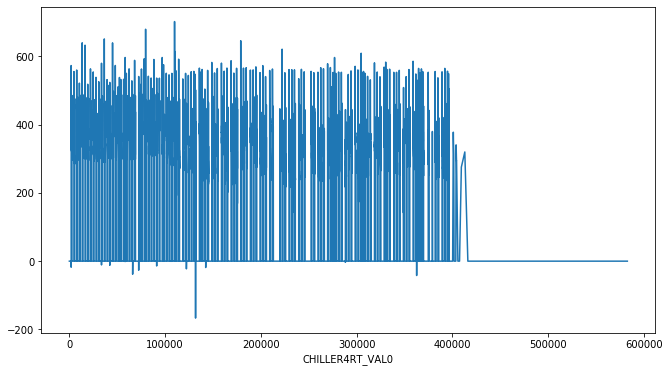

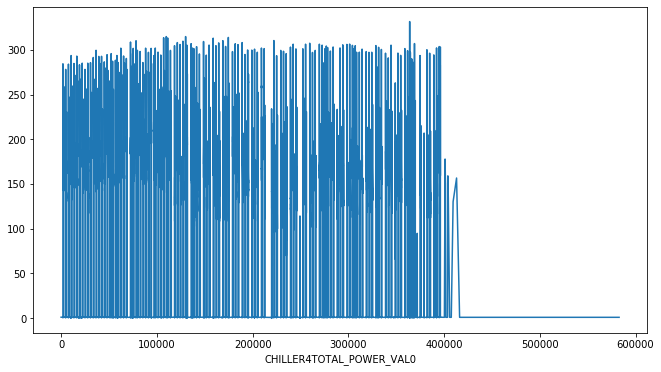

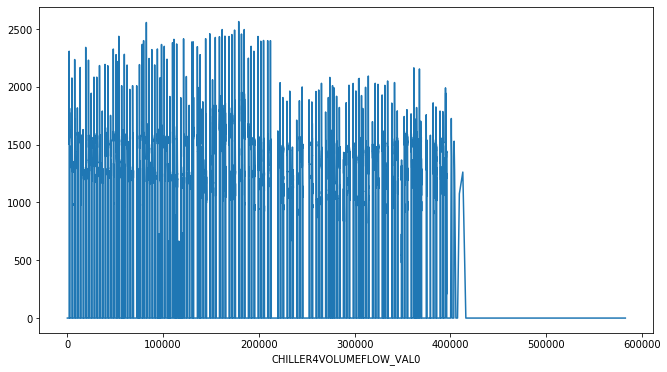

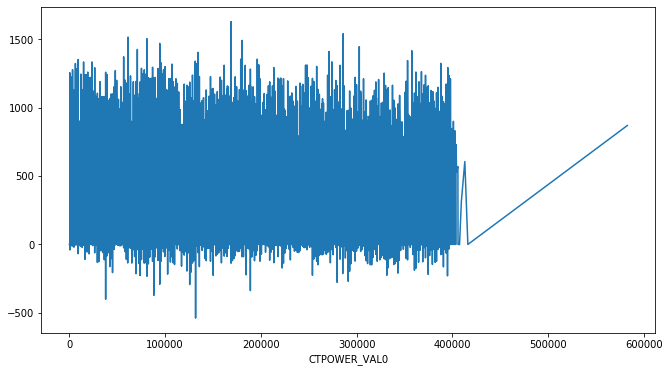

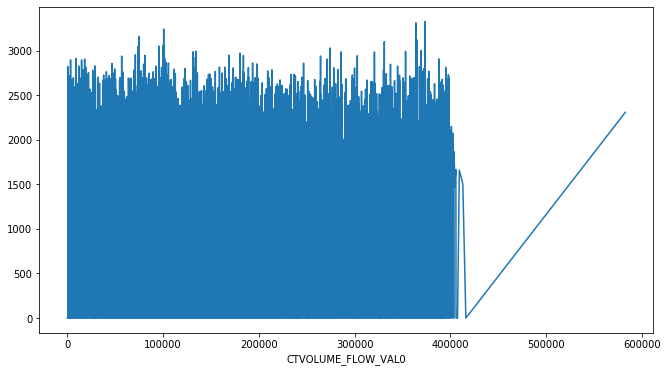

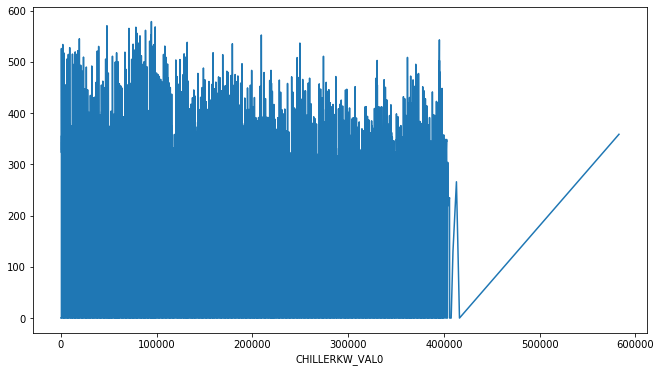

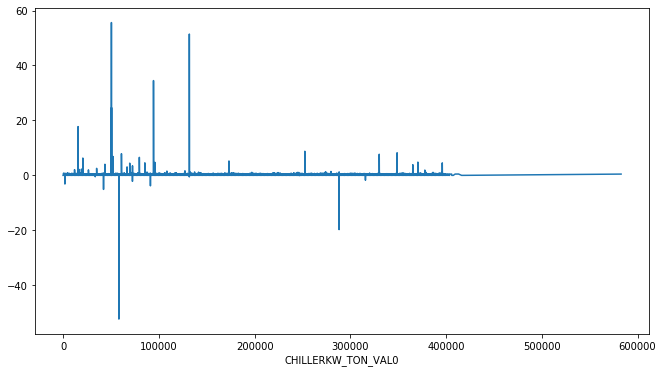

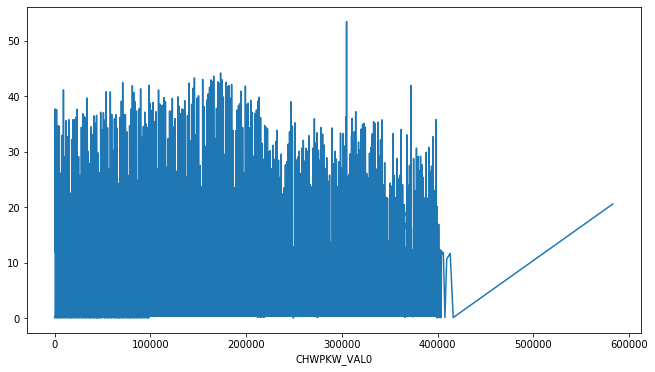

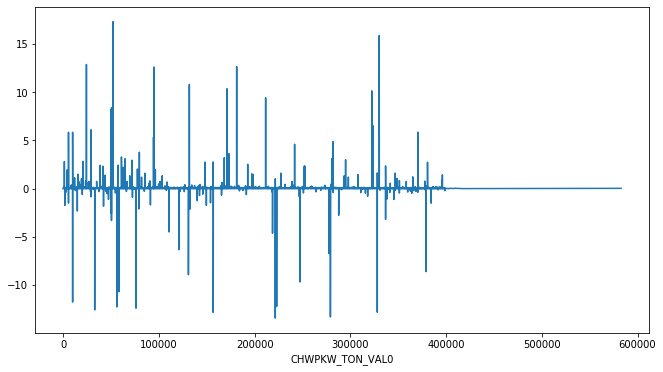

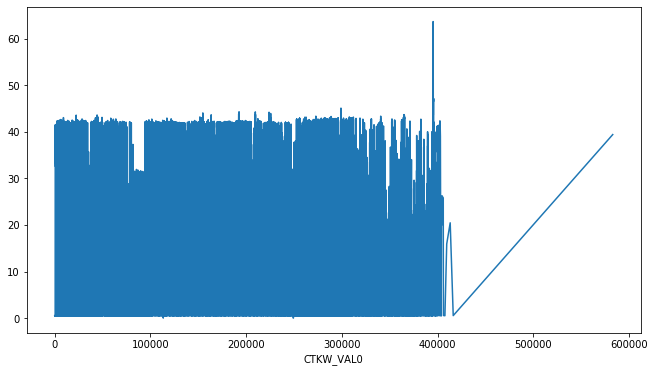

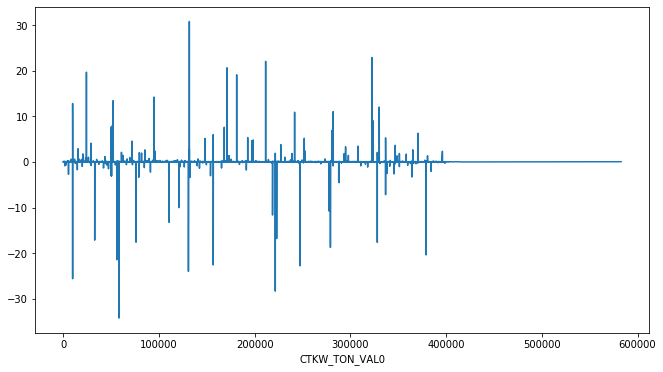

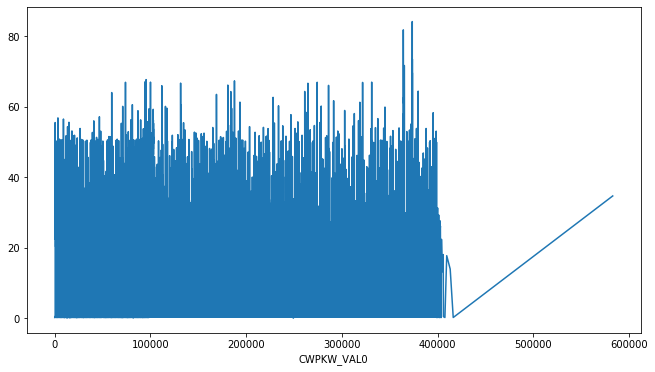

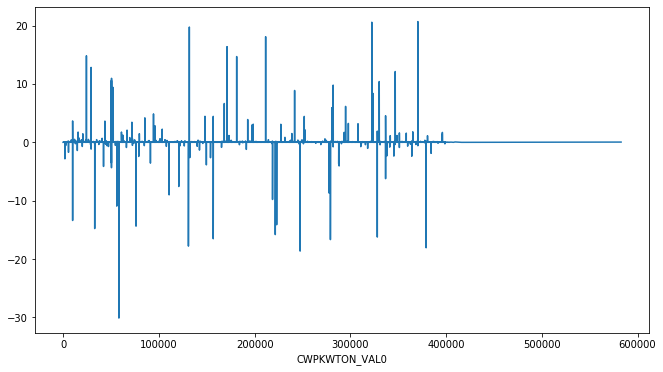

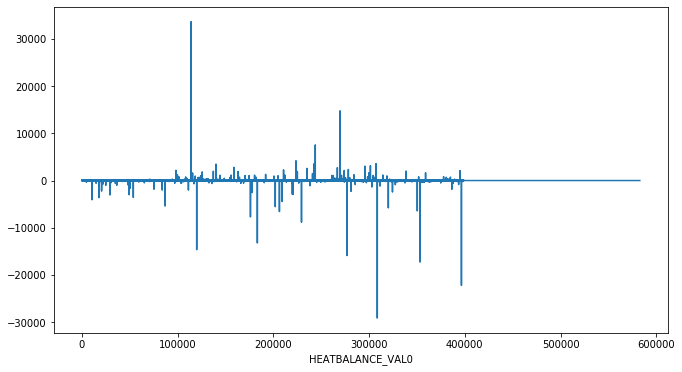

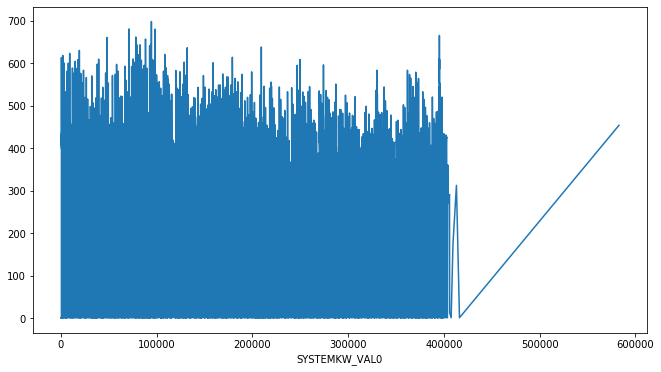

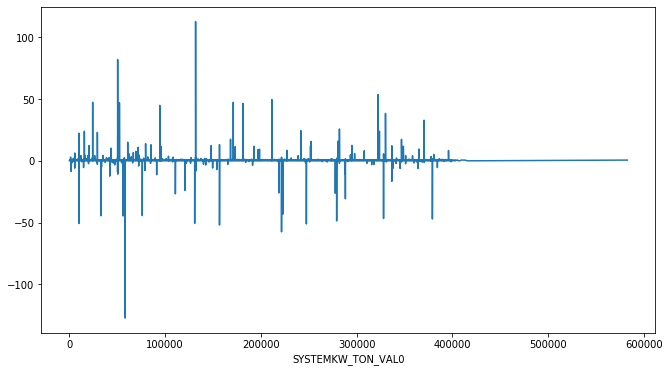

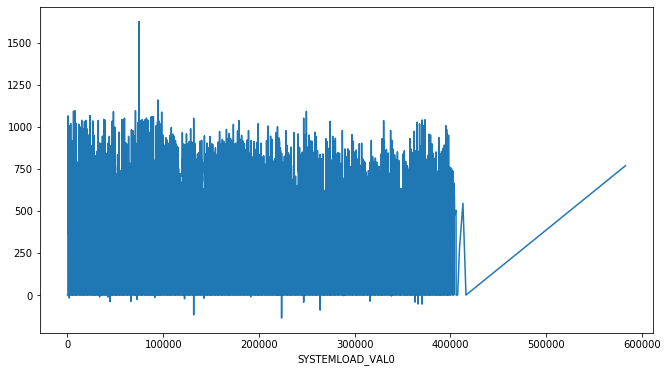

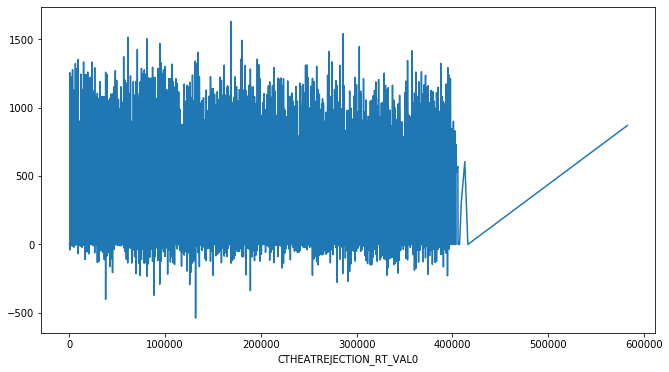

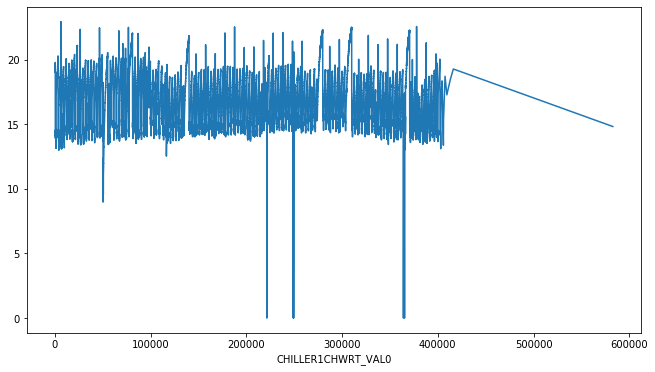

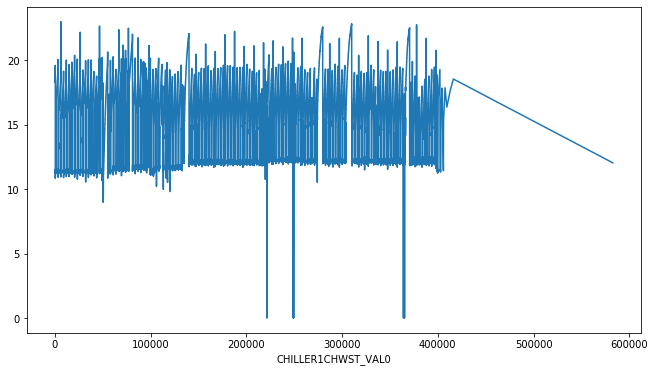

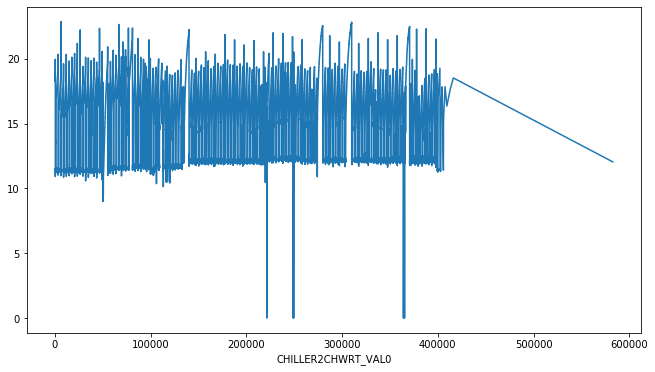

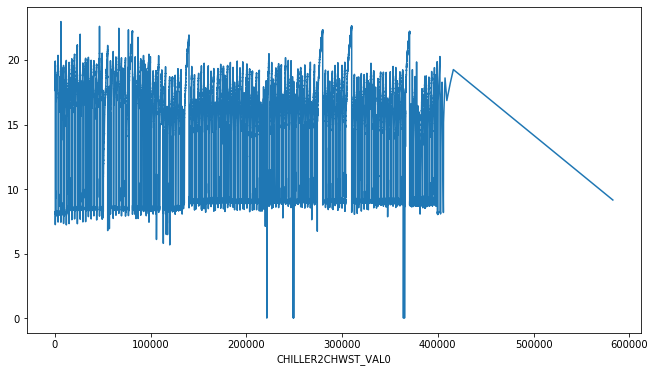

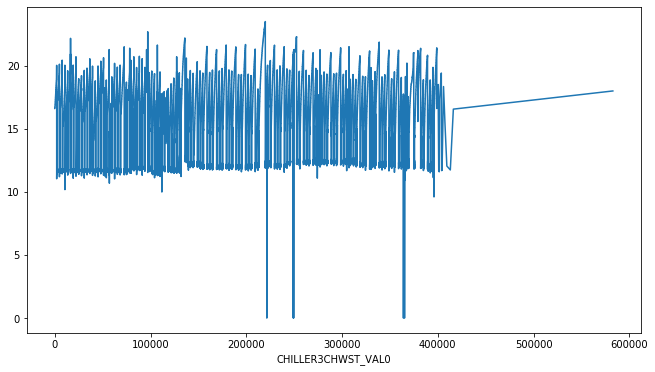

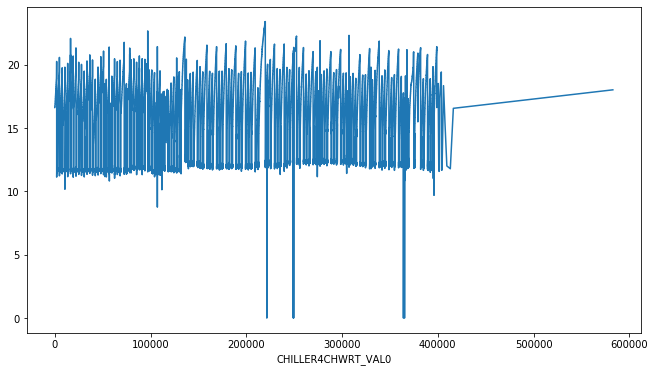

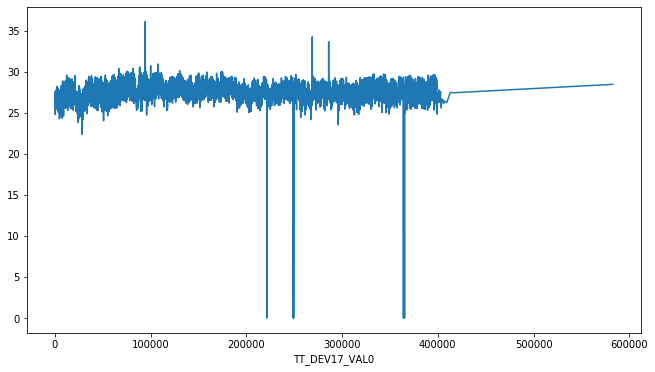

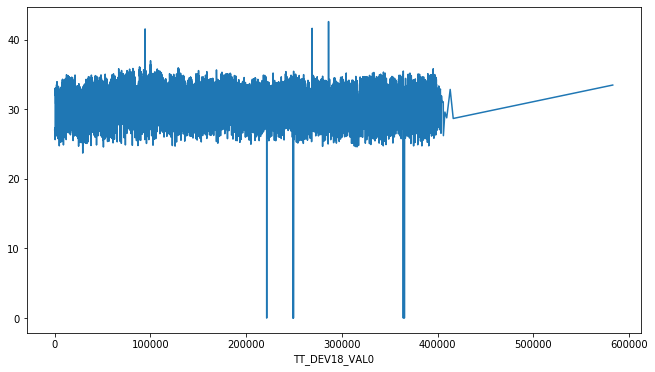

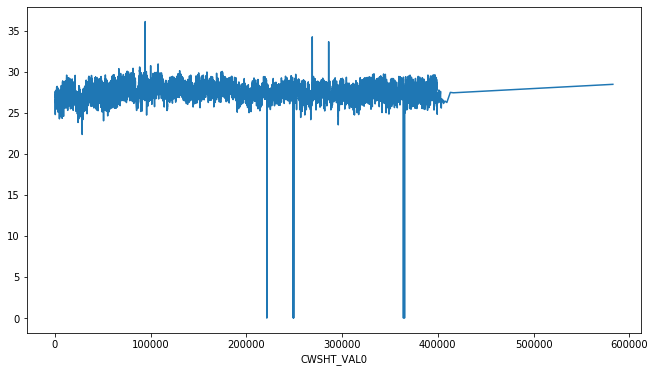

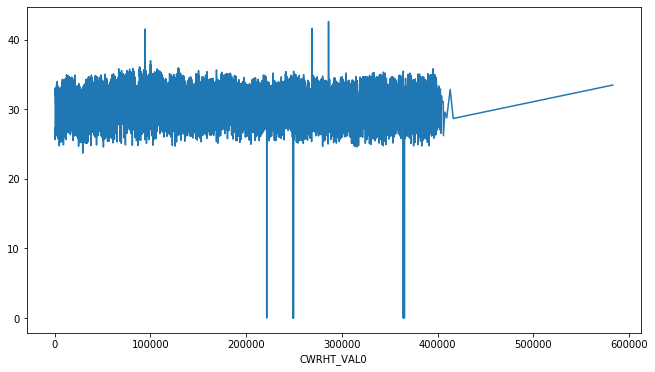

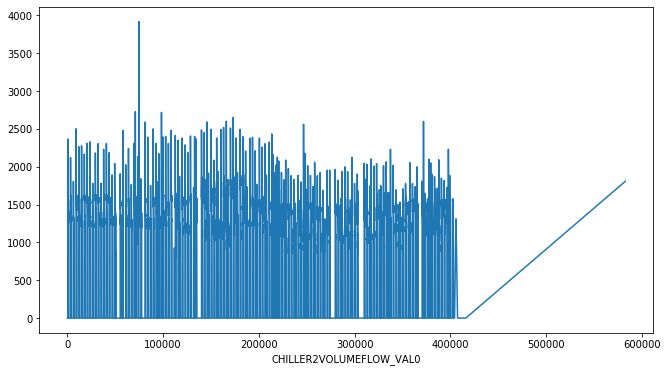

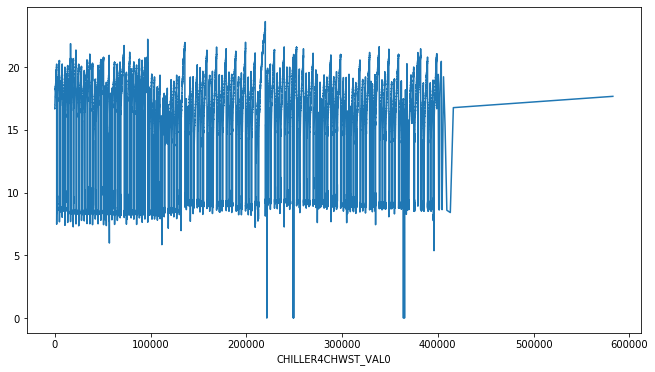

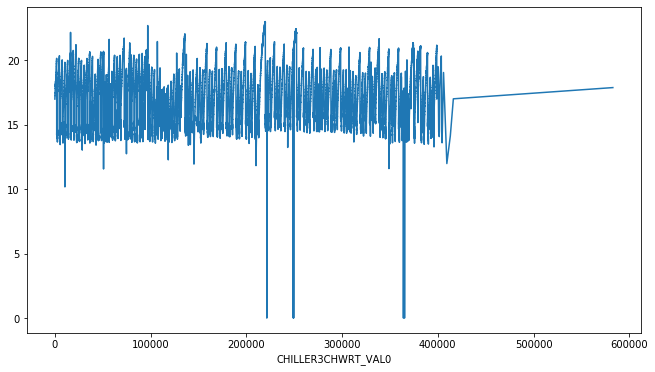

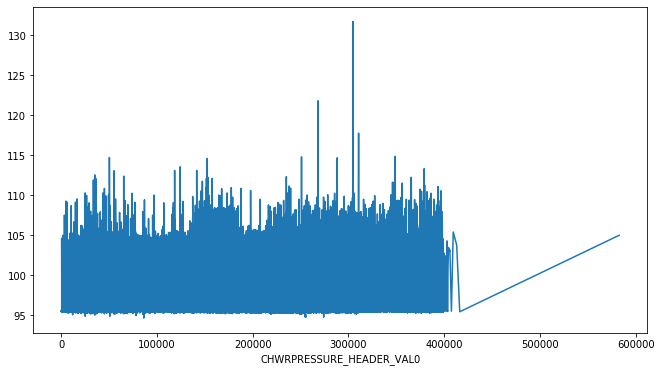

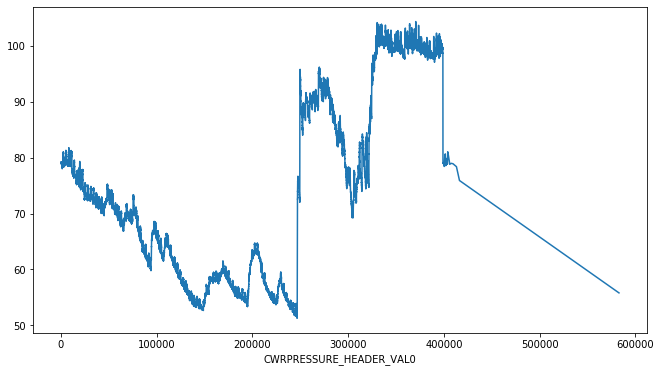

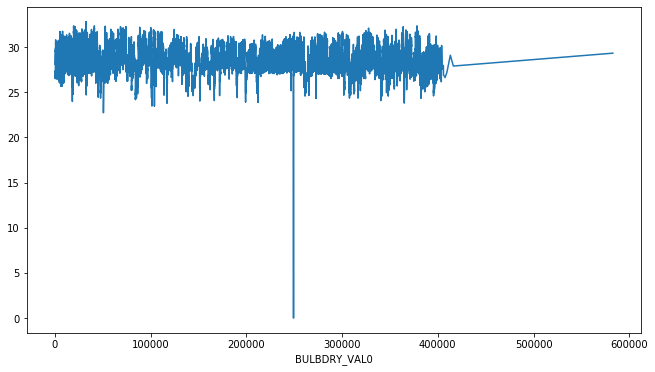

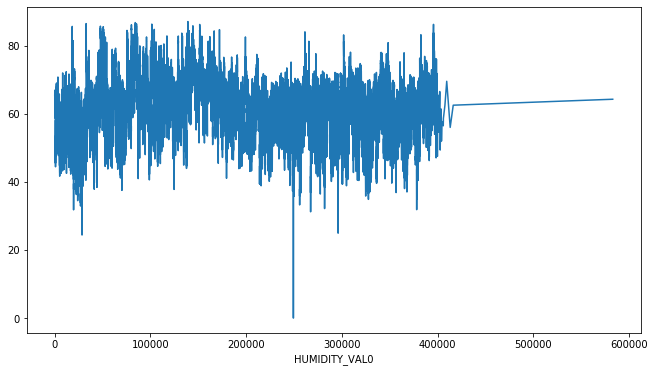

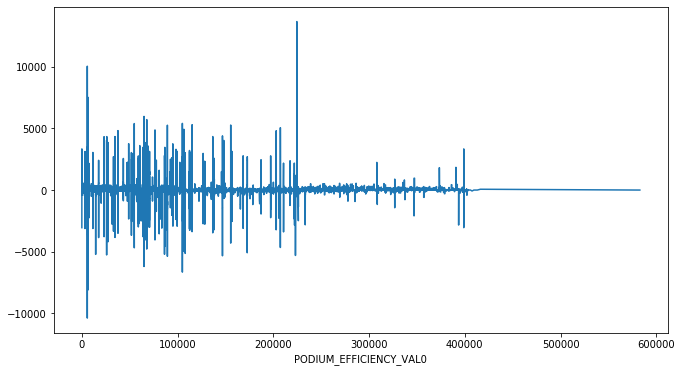

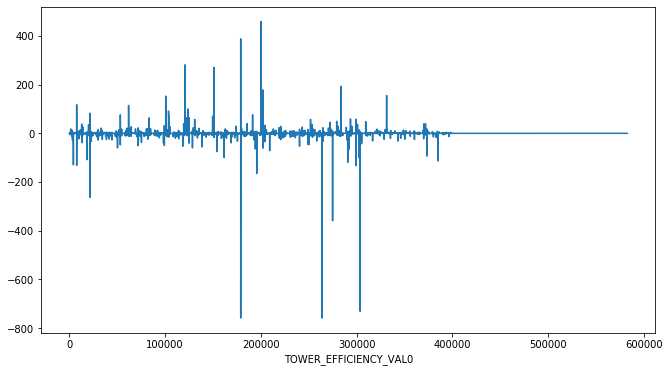

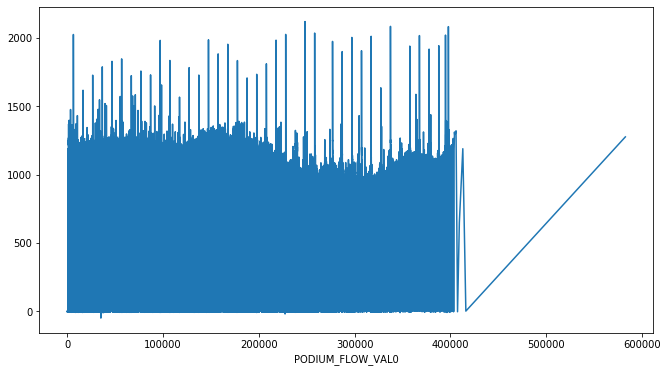

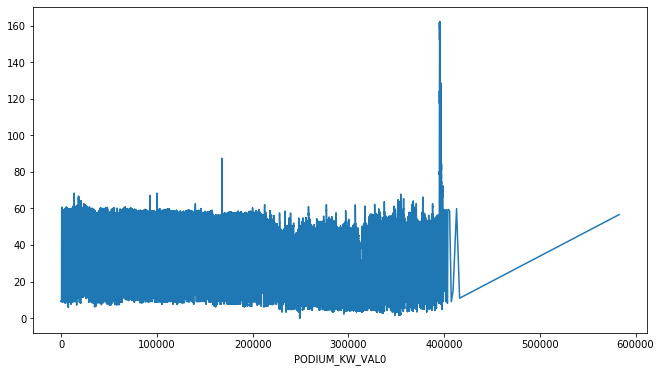

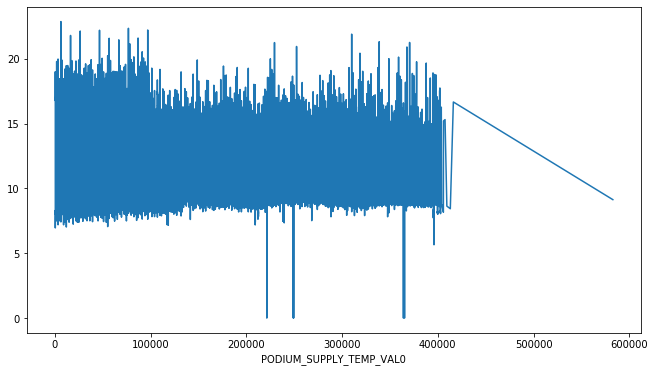

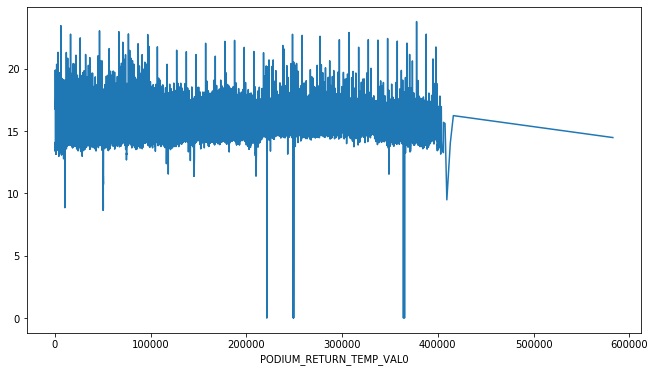

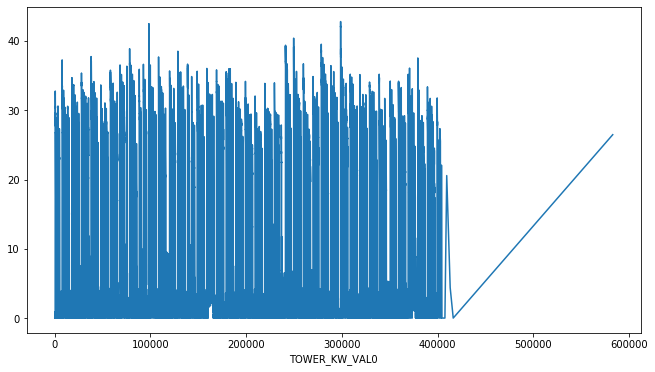

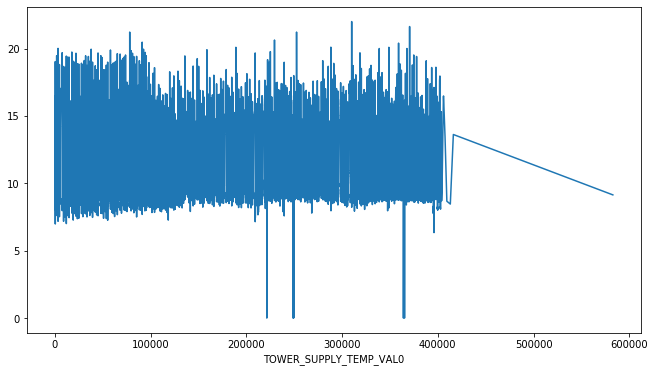

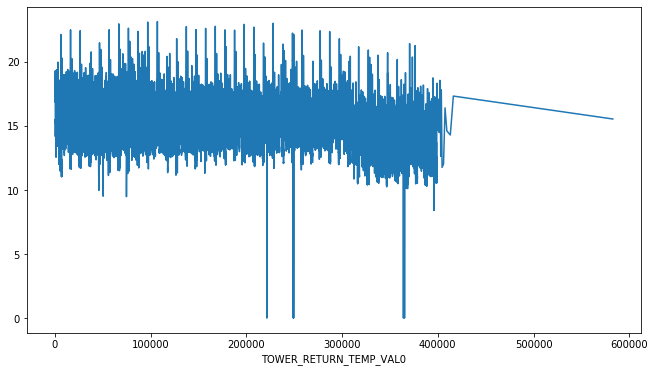

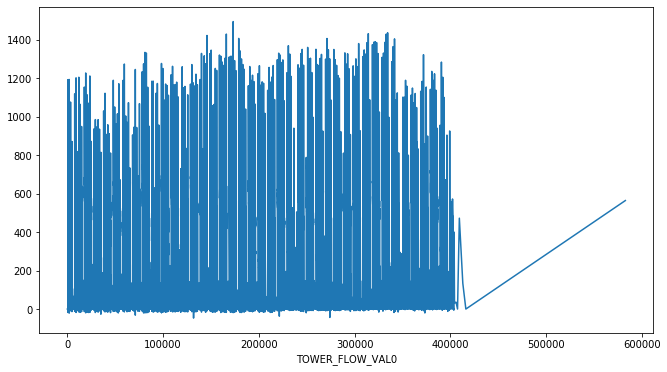

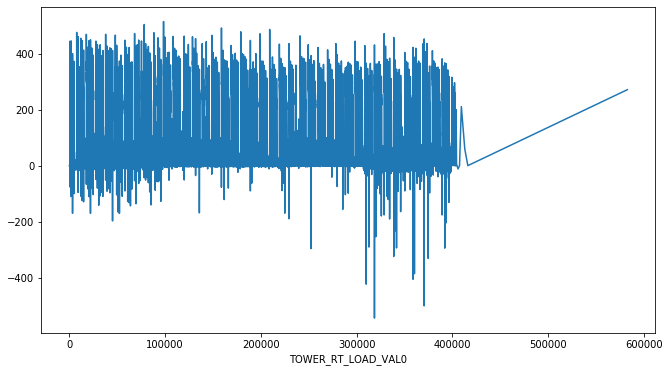

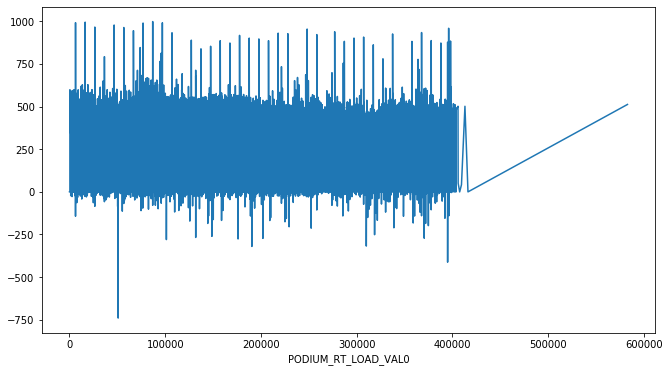

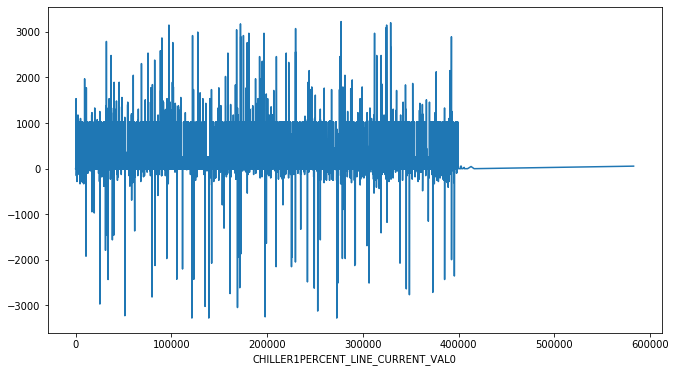

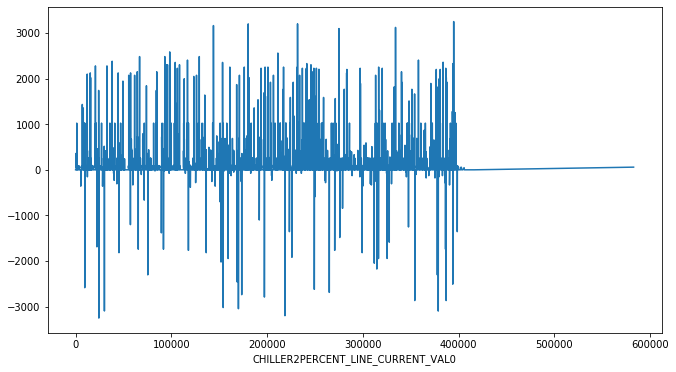

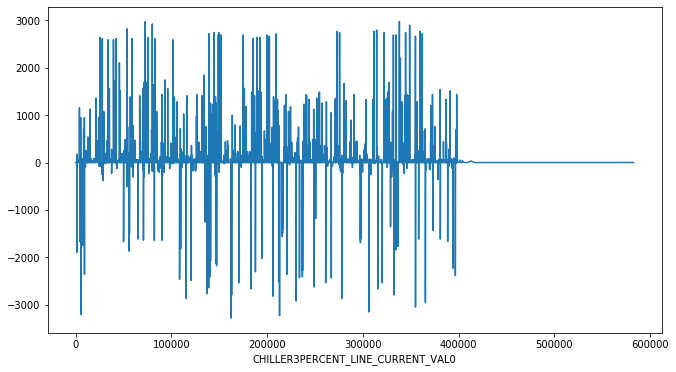

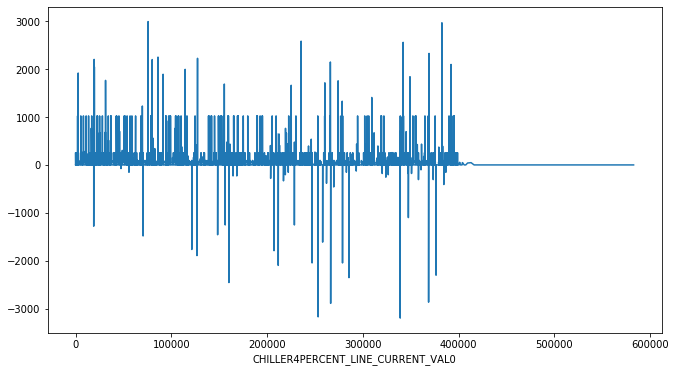

In [196]:
for variable in overview.columns[2:]:
    plt.figure(figsize = (11,6))
    plt.plot(overview[variable])
    plt.xlabel(variable)
    plt.show()

# Fitting data to train model for FDD

In [ ]:
# Model with 5 variables: 'Evaporator Supply Temperature', 'Evaporator Return Temperature','Pressure of Oil Feed',
# 'Temperature of Oil In sump', 'Power'
# Fit dataset to the model built for FDD, but with 5 features instead of 9 features

In [106]:
dt1 = {'Evaporator Supply Temperature': overview['CHILLER1CHWST_VAL0'],
       'Evaporator Return Temperature': overview['CHILLER1CHWRT_VAL0'],
       'Pressure of Oil Feed': chiller_info['CHILLER1OIL_PRESSURE_VAL0'], 
       'Temperature of Oil In sump': chiller_info['CHILLER1OIL_SUMP_TEM_VAL0'], 
       'Power': overview['CHILLER1TOTAL_POWER_VAL0'],
      }
dt1 = pd.DataFrame(dt1, columns = ['Evaporator Supply Temperature',
                                      'Evaporator Return Temperature','Pressure of Oil Feed','Temperature of Oil In sump'
                                      , 'Power'])
print(dt1)

        Evaporator Supply Temperature  Evaporator Return Temperature  \
0                           18.309999                      19.030001   
1                           18.309999                      19.049999   
2                           18.309999                      19.049999   
3                           18.309999                      19.049999   
4                           18.309999                      19.049999   
...                               ...                            ...   
407550                      17.879999                      18.709999   
409437                      16.379999                      17.270000   
413061                      17.700001                      18.459999   
416229                      18.559999                      19.270000   
582825                      12.050000                      14.820000   

        Pressure of Oil Feed  Temperature of Oil In sump      Power  
0                       -0.9                   50.400002    0.720

In [107]:
df1 = dt1.fillna(method='ffill',inplace=False)

In [108]:
df1.isnull().sum()

Evaporator Supply Temperature    0
Evaporator Return Temperature    0
Pressure of Oil Feed             0
Temperature of Oil In sump       0
Power                            0
dtype: int64

In [109]:
DATA_DIR = join(CONFIG_DIR,'chillerdoc','chillerdoc','fdd','data', 'predict')

In [110]:
destination = DATA_DIR + "\\testing.csv" 
df1.to_csv(destination,index=False)

In [ ]:
#Model with 7 variables: 'Evaporator Supply Temperature', 'Evaporator Return Temperature','Pressure of Oil Feed',
#'Temperature of Oil In sump', 'Power'
#Fit dataset to the model built for FDD, but with 5 features instead of 9 features

In [198]:
dt2 = {'Evaporator Supply Temperature': overview['CHILLER1CHWST_VAL0'],
       'Evaporator Return Temperature': overview['CHILLER1CHWRT_VAL0'],
       'Condenser Supply Temperature': overview['CWSHT_VAL0'],
       'Condenser Return Temperature': overview['CWRHT_VAL0'],
       'Pressure of Oil Feed': chiller_info['CHILLER1OIL_PRESSURE_VAL0'], 
       'Temperature of Oil In sump': chiller_info['CHILLER1OIL_SUMP_TEM_VAL0'], 
       'Power': overview['CHILLER1TOTAL_POWER_VAL0'], 
      }
dt2 = pd.DataFrame(dt2, columns = ['Evaporator Supply Temperature',
                                      'Evaporator Return Temperature', 'Condenser Supply Temperature',
                                   'Condenser Return Temperature', 'Pressure of Oil Feed',
                                   'Temperature of Oil In sump', 'Power'])
print(dt2)

        Evaporator Supply Temperature  Evaporator Return Temperature  \
0                           18.309999                      19.030001   
1                           18.309999                      19.049999   
2                           18.309999                      19.049999   
3                           18.309999                      19.049999   
4                           18.309999                      19.049999   
...                               ...                            ...   
407550                      17.879999                      18.709999   
409437                      16.379999                      17.270000   
413061                      17.700001                      18.459999   
416229                      18.559999                      19.270000   
582825                      12.050000                      14.820000   

        Condenser Supply Temperature  Condenser Return Temperature  \
0                          26.600000                     27.00000

In [199]:
dff2 = dt2.fillna(method='ffill',inplace=False)

In [200]:
dff2.isnull().sum()

Evaporator Supply Temperature    0
Evaporator Return Temperature    0
Condenser Supply Temperature     0
Condenser Return Temperature     0
Pressure of Oil Feed             0
Temperature of Oil In sump       0
Power                            0
dtype: int64

In [201]:
destination1 = DATA_DIR + "\\testing_1.csv" 
dff2.to_csv(destination1,index=False)